In [1]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection  import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [ ]:
#1.Purpose and Objectives of your Project

#In this project we are using a baseball dataset to determine effective factors in the number of games won. The data includes
#a set of offensiv as defensive measurements as well as some variables that show the performances of teams and are collected 
#during 1871-2015. However, the data was separated to four periods to find variables that are associated with the games won
#for each period separately and investigate whether the associated variables have changed during these periodsor not. In addition,
#we are interested to find if teams are more successful with high offenses, tight defenses or a balance of the two.

In [2]:
dt = pd.read_csv('F:\\canada\\Data Science\\DAT101-\\Project\\DAT 101 Term Project\\baseball_teams.csv', header=0)

In [3]:
dt.head()

Year  League Team  Franchise  Division  Final_Standing  Games_Played  \
0   1871    NaN   BS1        BNA      NaN               3            31   
1   1871    NaN   CH1        CNA      NaN               2            28   
2   1871    NaN   CL1        CFC      NaN               8            29   
3   1871    NaN   FW1        KEK      NaN               7            19   
4   1871    NaN   NY2        NNA      NaN               5            33   

   Unnamed: 7  Games_Won  Games_Lost  ... Hits_Allowed Home_Run_Allowed  \
0         NaN         20          10  ...          367                2   
1         NaN         19           9  ...          308                6   
2         NaN         10          19  ...          346               13   
3         NaN          7          12  ...          261                5   
4         NaN         16          17  ...          373                7   

  Walks_Allowed Strikeouts_Allowed  Errors  Double_Plays  Fielding_Percentage  \
0            42                 23     225           NaN                 0.83   
1            28                 22     218           NaN                 0.82   
2            53                 34     223           NaN                 0.81   
3            21                 17     163           NaN                 0.80   
4            42                 22     227           NaN                 0.83   

                 Team_Name                Home_Ball_Park  Attendance  
0     Boston Red Stockings           South End Grounds I         NaN  
1  Chicago White Stockings       Union Base-Ball Grounds         NaN  
2   Cleveland Forest Citys  National Association Grounds         NaN  
3     Fort Wayne Kekiongas                Hamilton Field         NaN  
4         New York Mutuals      Union Grounds (Brooklyn)         NaN  

[5 rows x 43 columns]

In [4]:
dt.shape

(2805, 43)

In [ ]:
#2.Data Exploration

In [5]:
dt.describe()

Year   Final_Standing  Games_Played   Unnamed: 7    Games_Won  \
count  2805.000000     2805.000000    2805.00000  2406.000000  2805.000000   
mean   1955.036720        4.107308     150.34795    78.465919    74.749020   
std      41.519083        2.323414      23.22725     4.698684    17.640402   
min    1871.000000        1.000000       6.00000    44.000000     0.000000   
25%    1919.000000        2.000000     153.00000    77.000000    66.000000   
50%    1963.000000        4.000000     157.00000    81.000000    77.000000   
75%    1992.000000        6.000000     162.00000    81.000000    87.000000   
max    2015.000000       13.000000     165.00000    84.000000   116.000000   

        Games_Lost  Runs_Scored      At_Bats         Hits      Doubles  ...  \
count  2805.000000  2805.000000  2805.000000  2805.000000  2805.000000  ...   
mean     74.749020   681.945811  5142.492335  1346.273440   227.624955  ...   
std      17.378079   135.738244   750.551691   219.891603    58.692602  ...   
min       4.000000    24.000000   211.000000    33.000000     3.000000  ...   
25%      65.000000   613.000000  5127.000000  1299.000000   193.000000  ...   
50%      76.000000   690.000000  5389.000000  1393.000000   231.000000  ...   
75%      87.000000   763.000000  5517.000000  1467.000000   270.000000  ...   
max     134.000000  1220.000000  5781.000000  1783.000000   376.000000  ...   

             Saves  Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  \
count  2805.000000       2805.000000   2805.000000       2805.000000   
mean     23.667736       4022.383244   1346.083779        101.136542   
std      16.281300        630.996942    219.521064         58.245002   
min       0.000000        162.000000     49.000000          0.000000   
25%       9.000000       4077.000000   1288.000000         46.000000   
50%      24.000000       4236.000000   1392.000000        109.000000   
75%      38.000000       4341.000000   1470.000000        148.000000   
max      68.000000       4518.000000   1993.000000        241.000000   

       Walks_Allowed  Strikeouts_Allowed       Errors  Double_Plays  \
count    2805.000000         2805.000000  2805.000000   2488.000000   
mean      474.010695          731.229234   186.337255    140.186495   
std       131.890032          296.409881   107.657444     29.322764   
min         0.000000            0.000000    47.000000     18.000000   
25%       427.000000          501.000000   116.000000    126.000000   
50%       494.000000          735.000000   145.000000    145.000000   
75%       555.000000          965.000000   217.000000    159.250000   
max       827.000000         1450.000000   639.000000    217.000000   

       Fielding_Percentage    Attendance  
count          2805.000000  2.526000e+03  
mean              0.961519  1.344346e+06  
std               0.030224  9.469316e+05  
min               0.760000  6.088000e+03  
25%               0.960000  5.287162e+05  
50%               0.970000  1.140348e+06  
75%               0.980000  2.014687e+06  
max               0.991000  4.483350e+06  

[8 rows x 33 columns]

In [11]:
dt.isnull().sum()

Year                      0
League                   50
Team                      0
Franchise                 0
Division               1517
Final_Standing            0
Games_Played              0
Unnamed: 7              399
Games_Won                 0
Games_Lost                0
Unnamed: 10            1545
Unnamed: 11            2181
League_Win               28
World_Series            357
Runs_Scored               0
At_Bats                   0
Hits                      0
Doubles                   0
Triples                   0
Home_Runs                 0
Walks                     0
Strike_Outs             120
Stolen_Bases            144
Caught_Stealing         859
Hit_By_Pitch           2325
Sacrifice_Fly          2325
Runs_Against              0
Earned_Runs               0
Earned_Run_Average        0
Complete_Games            0
Shutout                   0
Saves                     0
Infield_Put_Outs          0
Hits_Allowed              0
Home_Run_Allowed          0
Walks_Allowed       

In [12]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 2805 non-null   int64  
 1   League               2755 non-null   object 
 2   Team                 2805 non-null   object 
 3   Franchise            2805 non-null   object 
 4   Division             1288 non-null   object 
 5   Final_Standing       2805 non-null   int64  
 6   Games_Played         2805 non-null   int64  
 7   Unnamed: 7           2406 non-null   float64
 8   Games_Won            2805 non-null   int64  
 9   Games_Lost           2805 non-null   int64  
 10  Unnamed: 10          1260 non-null   object 
 11  Unnamed: 11          624 non-null    object 
 12  League_Win           2777 non-null   object 
 13  World_Series         2448 non-null   object 
 14  Runs_Scored          2805 non-null   int64  
 15  At_Bats              2805 non-null   i

In [16]:
print (dt['League'].unique())

[nan 'NL' 'AA' 'UA' 'PL' 'AL' 'FL']


In [17]:
print (dt.dtypes)

Year                     int64
League                  object
Team                    object
Franchise               object
Division                object
Final_Standing           int64
Games_Played             int64
Unnamed: 7             float64
Games_Won                int64
Games_Lost               int64
Unnamed: 10             object
Unnamed: 11             object
League_Win              object
World_Series            object
Runs_Scored              int64
At_Bats                  int64
Hits                     int64
Doubles                  int64
Triples                  int64
Home_Runs                int64
Walks                    int64
Strike_Outs            float64
Stolen_Bases           float64
Caught_Stealing        float64
Hit_By_Pitch           float64
Sacrifice_Fly          float64
Runs_Against             int64
Earned_Runs              int64
Earned_Run_Average     float64
Complete_Games           int64
Shutout                  int64
Saves                    int64
Infield_

In [21]:
print(dt.columns)

Index(['Year ', 'League', 'Team ', 'Franchise ', 'Division', 'Final_Standing',
       'Games_Played', 'Unnamed: 7', 'Games_Won', 'Games_Lost', 'Unnamed: 10',
       'Unnamed: 11', 'League_Win', 'World_Series', 'Runs_Scored', 'At_Bats',
       'Hits', 'Doubles', 'Triples', 'Home_Runs', 'Walks', 'Strike_Outs',
       'Stolen_Bases', 'Caught_Stealing', 'Hit_By_Pitch', 'Sacrifice_Fly',
       'Runs_Against', 'Earned_Runs', 'Earned_Run_Average', 'Complete_Games',
       'Shutout', 'Saves', 'Infield_Put_Outs', 'Hits_Allowed',
       'Home_Run_Allowed', 'Walks_Allowed', 'Strikeouts_Allowed', 'Errors',
       'Double_Plays', 'Fielding_Percentage', 'Team_Name', 'Home_Ball_Park',
       'Attendance'],
      dtype='object')


In [20]:
print(len(dt))

2805


In [8]:
#Dropping unuseful columns
drop_cols = ['League', 'Team ', 'Franchise ', 'Division','Team_Name', 'Home_Ball_Park', 'Attendance', 'Unnamed: 7', 'Unnamed: 10', 'Unnamed: 11']
dt2=dt.drop(drop_cols, axis=1)
dt2.tail(5)

Year   Final_Standing  Games_Played  Games_Won  Games_Lost League_Win  \
2800   2015               1           162         92          70      False   
2801   2015               2           162         84          78      False   
2802   2015               3           162         79          83      False   
2803   2015               4           162         74          88      False   
2804   2015               5           162         68          94      False   

     World_Series  Runs_Scored  At_Bats  Hits  ...  Shutout  Saves  \
2800        False          667     5385  1346  ...       21     47   
2801        False          696     5565  1486  ...       18     41   
2802        False          720     5649  1494  ...       12     44   
2803        False          650     5457  1324  ...        6     41   
2804        False          737     5572  1479  ...        4     36   

      Infield_Put_Outs  Hits_Allowed  Home_Run_Allowed  Walks_Allowed  \
2800              4337          1317               145            395   
2801              4333          1344               155            431   
2802              4400          1450               182            500   
2803              4321          1371               171            516   
2804              4279          1579               183            579   

      Strikeouts_Allowed  Errors  Double_Plays  Fielding_Percentage  
2800                1396      75         133.0                0.988  
2801                1165      78         145.0                0.987  
2802                1215      86         146.0                0.986  
2803                1393      92         138.0                0.985  
2804                1112      95         171.0                0.985  

[5 rows x 33 columns]

In [9]:
dt2.columns

Index(['Year ', 'Final_Standing', 'Games_Played', 'Games_Won', 'Games_Lost',
       'League_Win', 'World_Series', 'Runs_Scored', 'At_Bats', 'Hits',
       'Doubles', 'Triples', 'Home_Runs', 'Walks', 'Strike_Outs',
       'Stolen_Bases', 'Caught_Stealing', 'Hit_By_Pitch', 'Sacrifice_Fly',
       'Runs_Against', 'Earned_Runs', 'Earned_Run_Average', 'Complete_Games',
       'Shutout', 'Saves', 'Infield_Put_Outs', 'Hits_Allowed',
       'Home_Run_Allowed', 'Walks_Allowed', 'Strikeouts_Allowed', 'Errors',
       'Double_Plays', 'Fielding_Percentage'],
      dtype='object')

In [30]:
dt2.corr(method='pearson')

Year   Final_Standing  Games_Played  Games_Won  \
Year                 1.000000       -0.293981      0.601304   0.418790   
Final_Standing      -0.293981        1.000000     -0.171295  -0.732510   
Games_Played         0.601304       -0.171295      1.000000   0.676371   
Games_Won            0.418790       -0.732510      0.676371   1.000000   
Games_Lost           0.425112        0.502550      0.661355  -0.102111   
Runs_Scored          0.273367       -0.447966      0.532620   0.677243   
At_Bats              0.605436       -0.199481      0.986522   0.689233   
Hits                 0.506059       -0.306493      0.867794   0.725160   
Doubles              0.683101       -0.364275      0.679297   0.586949   
Triples             -0.610569        0.065342      0.002071   0.086865   
Home_Runs            0.837680       -0.358621      0.522866   0.484075   
Walks                0.572747       -0.283531      0.774200   0.655929   
Strike_Outs          0.892200       -0.225856      0.650705   0.419930   
Stolen_Bases        -0.392816       -0.044271     -0.097893   0.043120   
Caught_Stealing     -0.230845        0.024827      0.172786   0.078767   
Hit_By_Pitch        -0.204524       -0.121507     -0.020682   0.161396   
Sacrifice_Fly       -0.262328       -0.253320      0.086856   0.298843   
Runs_Against         0.275035        0.305040      0.513703   0.006238   
Earned_Runs          0.642611        0.100081      0.703112   0.235721   
Earned_Run_Average   0.371608        0.318717      0.174785  -0.220270   
Complete_Games      -0.876366        0.196974     -0.246025  -0.134360   
Shutout              0.095318       -0.380173      0.351139   0.545568   
Saves                0.897888       -0.403732      0.525381   0.505623   
Infield_Put_Outs     0.617324       -0.202563      0.996585   0.697276   
Hits_Allowed         0.507877        0.046543      0.858471   0.413214   
Home_Run_Allowed     0.884038       -0.173527      0.549978   0.320302   
Walks_Allowed        0.572311        0.013765      0.776006   0.380921   
Strikeouts_Allowed   0.879181       -0.346624      0.641185   0.518630   
Errors              -0.833145        0.308794     -0.494665  -0.430352   
Double_Plays         0.517770       -0.030141      0.612708   0.302562   
Fielding_Percentage  0.777934       -0.298955      0.859709   0.644387   

                     Games_Lost  Runs_Scored   At_Bats      Hits   Doubles  \
Year                   0.425112     0.273367  0.605436  0.506059  0.683101   
Final_Standing         0.502550    -0.447966 -0.199481 -0.306493 -0.364275   
Games_Played           0.661355     0.532620  0.986522  0.867794  0.679297   
Games_Won             -0.102111     0.677243  0.689233  0.725160  0.586949   
Games_Lost             1.000000     0.028576  0.632149  0.436382  0.339586   
Runs_Scored            0.028576     1.000000  0.618912  0.801701  0.692903   
At_Bats                0.632149     0.618912  1.000000  0.919542  0.736695   
Hits                   0.436382     0.801701  0.919542  1.000000  0.817653   
Doubles                0.339586     0.692903  0.736695  0.817653  1.000000   
Triples               -0.122844     0.252232  0.015327  0.152675 -0.134633   
Home_Runs              0.248887     0.500400  0.558739  0.532589  0.666301   
Walks                  0.385736     0.647082  0.774027  0.738454  0.646537   
Strike_Outs            0.495577     0.250706  0.630770  0.448089  0.590646   
Stolen_Bases          -0.186490     0.180675 -0.120572 -0.081719 -0.239242   
Caught_Stealing        0.092447    -0.025908  0.121801  0.136994 -0.068306   
Hit_By_Pitch          -0.163465     0.231644  0.039595  0.081104  0.140882   
Sacrifice_Fly         -0.297095     0.509470  0.296599  0.495694  0.362087   
Runs_Against           0.686534     0.548338  0.565210  0.592145  0.519993   
Earned_Runs            0.726280     0.554383  0.742577  0.737566  0.735155   
Earned_Run_Average     0.480528     0.317673  0.227261  0.308812  0.433879   
Complete_Games   

In [63]:
dt2['Year '].unique()

array([1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
       1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903,
       1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914,
       1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925,
       1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936,
       1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947,
       1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015], dtype=int64)

In [75]:
#a.Period 1 – before 1920
#b.Period 2 -  1920 to 1960
#c.Period 3 – 1960 to 1990
#d.Period 4 – 1990 to 2010
p1=dt2[dt2['Year ']<1920]
p2=dt2[(dt2['Year ']>=1920) & (dt2['Year ']<1960)]
p3=dt2[(dt2['Year ']>=1960) & (dt2['Year ']<1990)]
p4=dt2[(dt2['Year ']>=1990) & (dt2['Year ']<2010)]
p=dt2[(dt2['Year ']>=1960) & (dt2['Year ']<=2010)]

1.Perform an exploratory data analysis to understand the statistical properties and distribution shapes of 8 key variables of your choice. Perform this analysis for a single dataset that spans 1960 to 2010

In [ ]:
# I do not have any background about baseball so, to select the 8 key variables I plot the scatter plot of Games_Won and 
#Games_Lost with variables. I separate graphs based on the type of covariates i.e. offensive covariates and defensive covariates
#to find wich variables are correlated with Game Won and Game Lost during 1960-2010 and consider them as key variables.

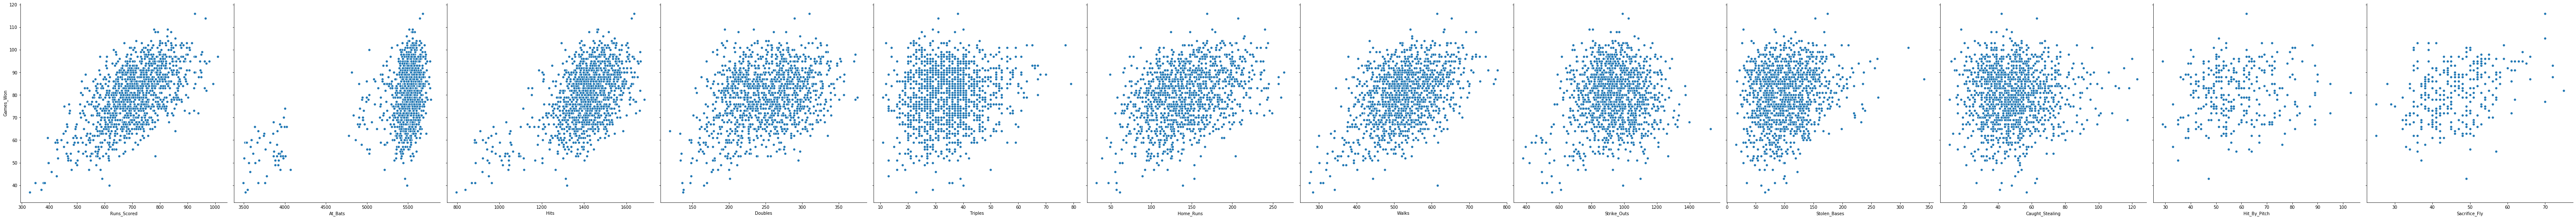

In [76]:
#correlation between offensive measurments and Games_Won for a single dataset that spans 1960 to 2010
import seaborn as sns
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(p, x_vars=['Runs_Scored', 'At_Bats', 'Hits','Doubles', 'Triples', 'Home_Runs', 'Walks', 'Strike_Outs','Stolen_Bases', 'Caught_Stealing', 'Hit_By_Pitch', 'Sacrifice_Fly'], y_vars='Games_Won', height=7)

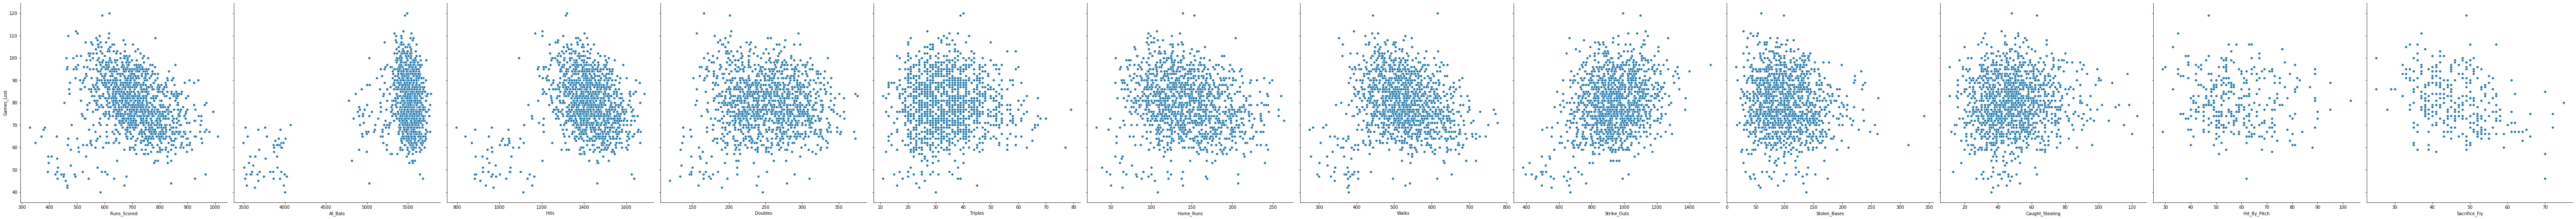

In [77]:
#correlation between offensive measurments and Games_Lost for a single dataset that spans 1960 to 2010
sns.pairplot(p, x_vars=['Runs_Scored', 'At_Bats', 'Hits','Doubles', 'Triples', 'Home_Runs', 'Walks', 'Strike_Outs','Stolen_Bases', 'Caught_Stealing', 'Hit_By_Pitch', 'Sacrifice_Fly'], y_vars='Games_Lost', height=7)

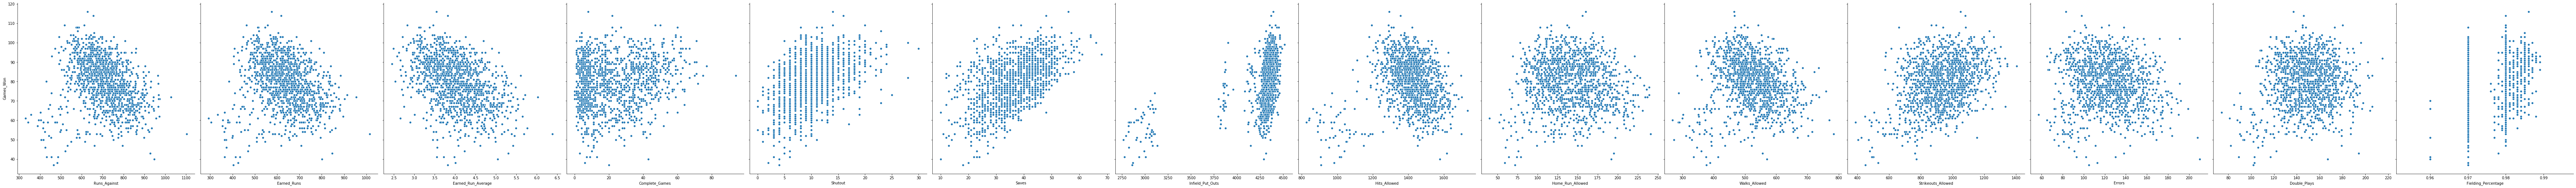

In [80]:
#correlation between defensive measurments and Games_Won
sns.pairplot(p, x_vars=['Runs_Against', 'Earned_Runs', 'Earned_Run_Average', 'Complete_Games','Shutout', 'Saves', 'Infield_Put_Outs', 'Hits_Allowed','Home_Run_Allowed', 'Walks_Allowed', 'Strikeouts_Allowed', 'Errors','Double_Plays', 'Fielding_Percentage'], y_vars='Games_Won', height=7)

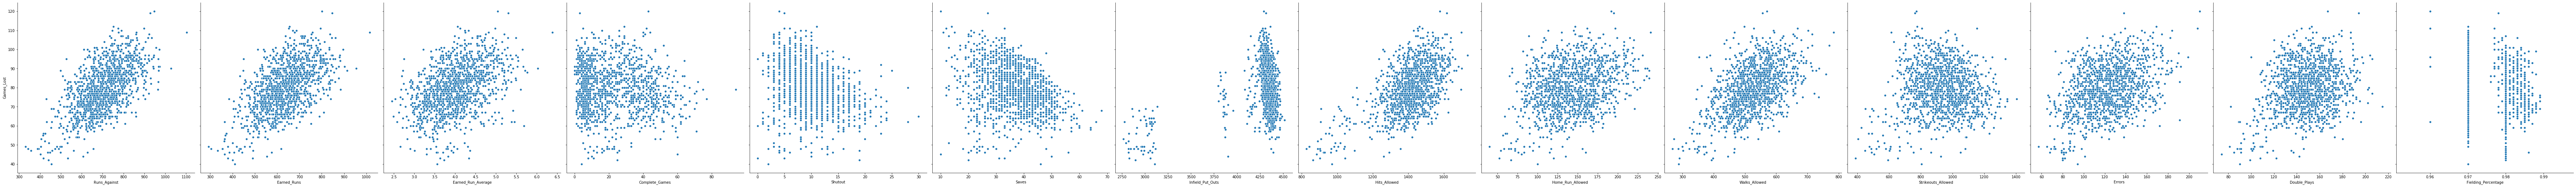

In [79]:
#correlation between defensive measurments and Games_Lost
sns.pairplot(p, x_vars=['Runs_Against', 'Earned_Runs', 'Earned_Run_Average', 'Complete_Games','Shutout', 'Saves', 'Infield_Put_Outs', 'Hits_Allowed','Home_Run_Allowed', 'Walks_Allowed', 'Strikeouts_Allowed', 'Errors','Double_Plays', 'Fielding_Percentage'], y_vars='Games_Lost', height=7)

In [82]:
keyvars= dt2[['Runs_Scored', 'Hits','Home_Runs', 'Walks','Runs_Against', 'Earned_Runs', 'Hits_Allowed', 'Errors']]
keyvars.head(5)

Runs_Scored  Hits  Home_Runs  Walks  Runs_Against  Earned_Runs  \
0          401   426          3     60           303          109   
1          302   323         10     60           241           77   
2          249   328          7     26           341          116   
3          137   178          2     33           243           97   
4          302   403          1     33           313          121   

   Hits_Allowed  Errors  
0           367     225  
1           308     218  
2           346     223  
3           261     163  
4           373     227

In [83]:
#1.a-Calculate the descriptive statistics for the 8 variables 
keyvars.describe()

Runs_Scored         Hits    Home_Runs        Walks  Runs_Against  \
count  2805.000000  2805.000000  2805.000000  2805.000000   2805.000000   
mean    681.945811  1346.273440   101.136542   473.649198    681.945811   
std     135.738244   219.891603    61.468300   132.585884    134.914999   
min      24.000000    33.000000     0.000000     0.000000     34.000000   
25%     613.000000  1299.000000    42.000000   425.000000    609.000000   
50%     690.000000  1393.000000   107.000000   493.000000    688.000000   
75%     763.000000  1467.000000   149.000000   554.000000    764.000000   
max    1220.000000  1783.000000   264.000000   835.000000   1252.000000   

       Earned_Runs  Hits_Allowed       Errors  
count  2805.000000   2805.000000  2805.000000  
mean    570.895187   1346.083779   186.337255  
std     146.958007    219.521064   107.657444  
min      25.000000     49.000000    47.000000  
25%     500.000000   1288.000000   116.000000  
50%     590.000000   1392.000000   145.000000  
75%     666.000000   1470.000000   217.000000  
max    1023.000000   1993.000000   639.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002108770DF48>,
      dtype=object)

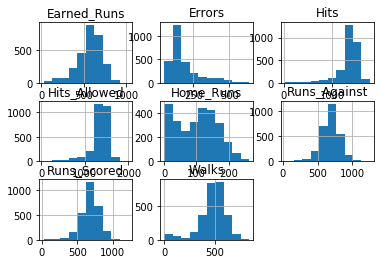

In [84]:
#1.b-Show  a histogram for each of the 8 variables
#1.c-Show a boxplot for each of the 8 variables
#1.d-Comment on the visual shape of the distribution of each variable
#i.Is it symmetric?
#ii.Is there a single mode?
#iii.Is it narrow or wide?
#iv.Are there many outliers?
#1.e-Comment on the validity of the assumption that each of the 8 variables is normally distributed.

keyvars.hist()

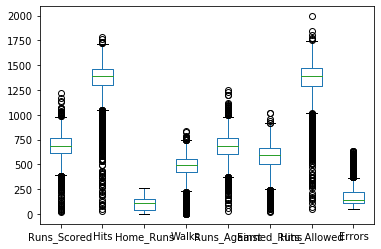

In [85]:
keyvars.plot.box()

In [87]:
keyvars.columns

Index(['Runs_Scored', 'Hits', 'Home_Runs', 'Walks', 'Runs_Against',
       'Earned_Runs', 'Hits_Allowed', 'Errors'],
      dtype='object')

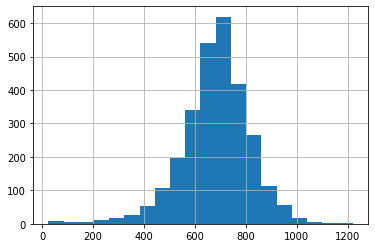

In [88]:
keyvars['Runs_Scored'].hist(bins=20)

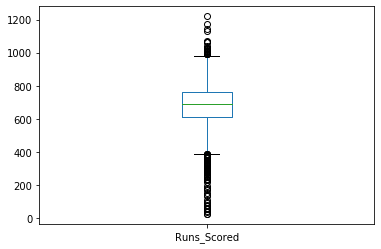

In [89]:
keyvars['Runs_Scored'].plot.box()

In [ ]:
#The histogram and box plot for Runs Scored shows that its distributions is approximately symmetric and its distribution is 
#close to a normal distribution. However, there are lots of outliers for this variable. 

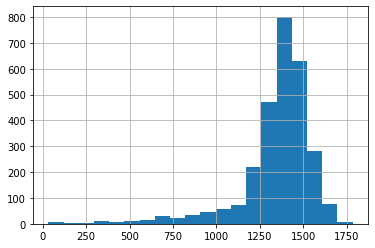

In [93]:
keyvars['Hits'].hist(bins=20)

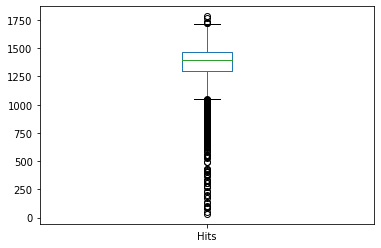

In [91]:
keyvars['Hits'].plot.box()

In [ ]:
#The histogram and box plot for Hits showes that its distributions is highly skewed to the left and its distribution is 
#not normal. There are lots of outliers for this variable. 

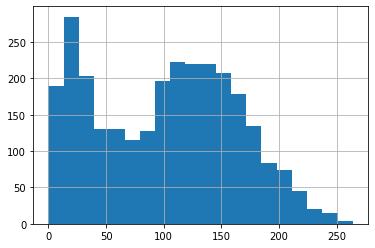

In [94]:
keyvars['Home_Runs'].hist(bins=20)

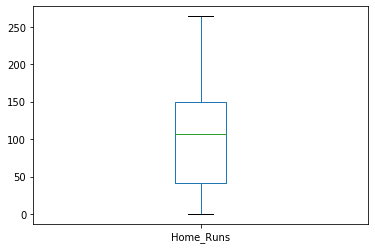

In [95]:
keyvars['Home_Runs'].plot.box()

In [ ]:
#The histogram and box plot for Home Runs shows that it has a bimodal distribution and its distribution is 
#not normal. There is no outlier for this variable.

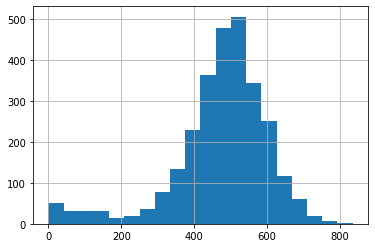

In [96]:
keyvars['Walks'].hist(bins=20)

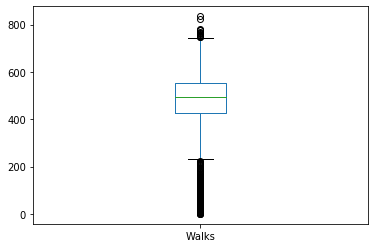

In [98]:
keyvars['Walks'].plot.box()

In [ ]:
#The histogram and box plot for Walks seems to be bimodal as its distribution at zero is a bit inflated. 
#consequently, the distribution of the Walk cannot be normal as its left tail has a considerable density and there are
#lots of outliers for this variable. 

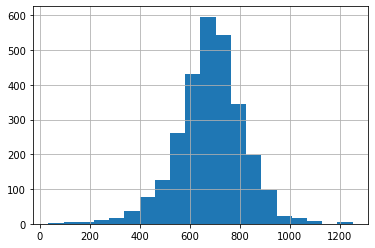

In [99]:
keyvars['Runs_Against'].hist(bins=20)

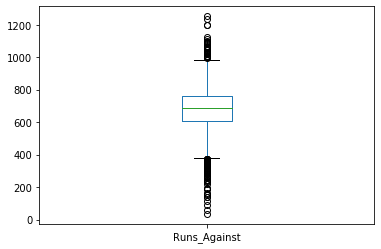

In [100]:
keyvars['Runs_Against'].plot.box()

In [ ]:
#The histogram and box plot for Runs Scored shows that its distributions is symmetric and close to a normal distribution.
#However, there are lots of outliers at its two tails. 

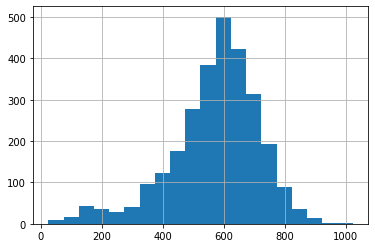

In [101]:
keyvars['Earned_Runs'].hist(bins=20)

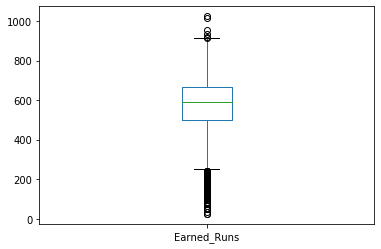

In [102]:
keyvars['Earned_Runs'].plot.box()

In [ ]:
#The histogram and box plot for Earned Runs showed that its distributions is a little skewed to the left and its distribution
#cannot be considered as a normal distribution. There are lots of outliers for this variable. 

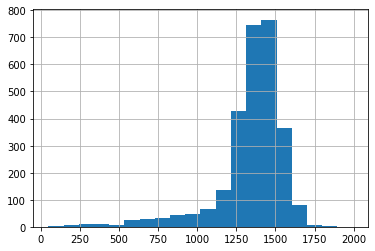

In [103]:
keyvars['Hits_Allowed'].hist(bins=20)

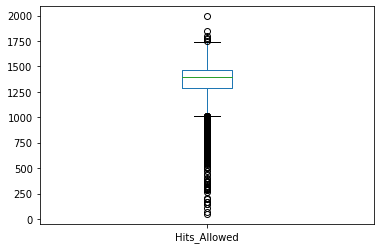

In [104]:
keyvars['Hits_Allowed'].plot.box()

In [ ]:
#The histogram and box plot for Hits Allowed are highly skewed to the left and its distribution is 
#far from a normal distribution.There are lots of outliers for this variable specially at the left tail.

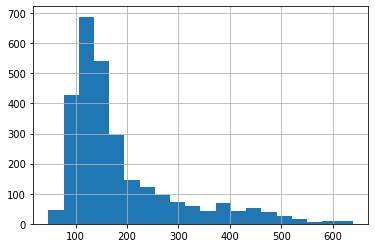

In [105]:
keyvars['Errors'].hist(bins=20)

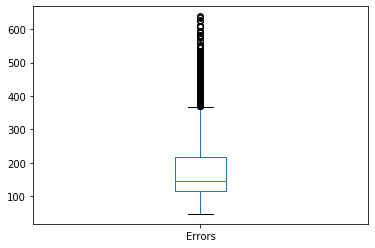

In [106]:
keyvars['Errors'].plot.box()

In [ ]:
#The histogram and box plot for Errors are highly skewed to the right and its distribution is 
#not a normal distribution. There are lots of outliers at the right tail of this variable. 

2-Do a correlation analysis for the following pairs of fields for the complete data spanning 1960 to 2010

a-Games Won vs Runs Scored

b-Games Won vs Runs Against

c-Games Won vs (Runs Scored minus Runs Against)

d-Games Lost vs Runs Scored

e-Games Lost vs Runs Against

f-Games Lost vs (Runs Scored minus Runs Against

g-Provide an interpretation and commentary for your analysis.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002108A36B348>,
      dtype=object)

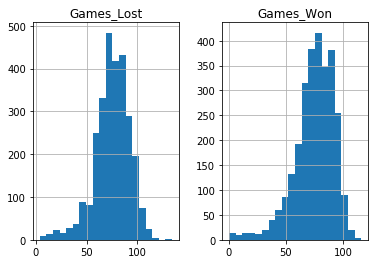

In [110]:
#First I check the distribution of Game Won and Game Lost. 
dt[['Games_Won','Games_Lost']].hist(bins=20)

In [ ]:
#3.Correlation Analysis
#Since Game Won and Game Lost have skewed distribution and are not normal I use spearman correlation.

In [111]:
from scipy.stats import spearmanr
corr, _ = spearmanr(p['Games_Won'], p['Runs_Scored'])
print('Spearmans correlation of Games Won and Runs Scored: %.3f' % corr)

Spearmans correlation of Games Won and Runs Scored: 0.555


In [112]:
corr, _ = spearmanr(p['Games_Won'], p['Runs_Against'])
print('Spearmans correlation of Games Won and Runs Against: %.3f' % corr)

Spearmans correlation of Games Won and Runs Against: -0.358


In [113]:
dif=p['Runs_Scored']-p['Runs_Against']
corr, _ = spearmanr(p['Games_Won'], dif)
print('Spearmans correlation of Games Won and dif: %.3f' % corr)

Spearmans correlation of Games Won and dif: 0.873


In [114]:
corr, _ = spearmanr(p['Games_Lost'], p['Runs_Scored'])
print('Spearmans correlation of Games Lost and Runs Scored: %.3f' % corr)

Spearmans correlation of Games Lost and Runs Scored: -0.326


In [115]:
corr, _ = spearmanr(p['Games_Lost'], p['Runs_Against'])
print('Spearmans correlation of Games Lost and Runs Against: %.3f' % corr)

Spearmans correlation of Games Lost and Runs Against: 0.580


In [117]:
corr, _ = spearmanr(p['Games_Lost'], dif)
print('Spearmans correlation of Games Lost and dif: %.3f' % corr)

Spearmans correlation of Games Lost and dif: -0.868


In [ ]:
#Game Won has a large positive correlation with Run Scored (r=.55) and a moderate negative correlation with Runs Against (r=-.36).
#Also, there is a strong positive correlation between Game Won with difference between Run Scored and Run Against 
#(r=.87).

#Game Lost has a moderate negative correlation with Run Scored (r=-.32) and a large positive correlation with Runs Against
#(r=.58). Also, there is a strong negative correlation between Game Lost with difference between Run Scored and Run Against
#(r=-.87).

3-Create a multiple linear regression model for each of the 4 time periods noted above and select the independent variables that are good predictors of games won.

a-Keep the model as simple as possible

b-Try combinations of offensive and defensive fields as independent variables.

c-Justify your model in terms of the independent variables you selected



4-Evaluate each  of your 4 regression models

a-Statistical significance of the overall model

b-Statistical significance of each coefficient, including the intercept

c-Are your independent variables approximately normally distributed?


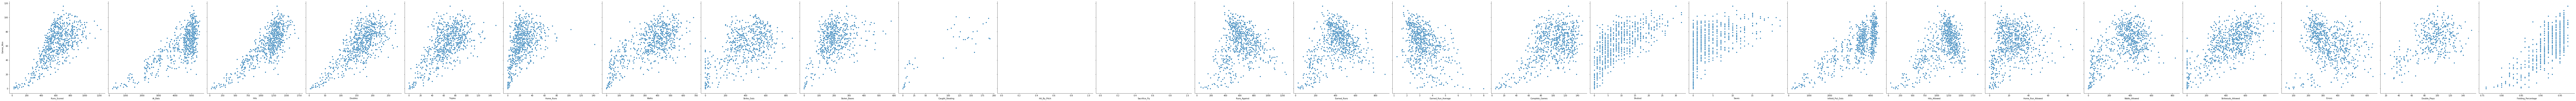

In [168]:
#4.Linear Regression Models and 5.Model Validation

#Exploratory analysis (Cnt.) for period 1:
#Scatter plot of Games Won with all independent offensive and defensive variables.
sns.pairplot(p1, x_vars=['Runs_Scored', 'At_Bats', 'Hits','Doubles', 'Triples', 'Home_Runs', 'Walks', 'Strike_Outs',
       'Stolen_Bases', 'Caught_Stealing', 'Hit_By_Pitch', 'Sacrifice_Fly',
       'Runs_Against', 'Earned_Runs', 'Earned_Run_Average', 'Complete_Games',
       'Shutout', 'Saves', 'Infield_Put_Outs', 'Hits_Allowed',
       'Home_Run_Allowed', 'Walks_Allowed', 'Strikeouts_Allowed', 'Errors',
       'Double_Plays', 'Fielding_Percentage'], y_vars='Games_Won', height=7)

In [171]:
#Exploratory analysis for period 1:
#Correlation between all independent variables
drop_cols = ['Year ', 'Final_Standing', 'Games_Played', 'Games_Lost','League_Win', 'World_Series', 'Hit_By_Pitch', 'Sacrifice_Fly']
p1.new=p1.drop(drop_cols, axis=1)
p1.new.corr(method="spearman")

Games_Won  Runs_Scored   At_Bats      Hits   Doubles  \
Games_Won             1.000000     0.609485  0.635757  0.700850  0.664230   
Runs_Scored           0.609485     1.000000  0.399262  0.758286  0.672725   
At_Bats               0.635757     0.399262  1.000000  0.762945  0.585992   
Hits                  0.700850     0.758286  0.762945  1.000000  0.790539   
Doubles               0.664230     0.672725  0.585992  0.790539  1.000000   
Triples               0.567015     0.710060  0.534613  0.731218  0.579910   
Home_Runs             0.486563     0.723392  0.411831  0.645367  0.629602   
Walks                 0.621796     0.632252  0.654047  0.693361  0.615677   
Strike_Outs           0.440287     0.178680  0.661593  0.349182  0.424550   
Stolen_Bases          0.343250     0.684253  0.055011  0.351111  0.246784   
Caught_Stealing       0.833568     0.640424  0.848532  0.867990  0.773285   
Runs_Against          0.029506     0.587389  0.379451  0.531624  0.410463   
Earned_Runs           0.148052     0.555897  0.522213  0.645120  0.512410   
Earned_Run_Average   -0.378637     0.251076 -0.087315  0.160704  0.071842   
Complete_Games        0.374354     0.550255  0.413958  0.437852  0.327829   
Shutout               0.691273     0.058647  0.552729  0.317448  0.339055   
Saves                 0.592741     0.212410  0.585054  0.505305  0.485716   
Infield_Put_Outs      0.671723     0.233997  0.922037  0.625373  0.529576   
Hits_Allowed          0.269425     0.490005  0.686776  0.726588  0.566666   
Home_Run_Allowed      0.233305     0.558994  0.396297  0.529074  0.472718   
Walks_Allowed         0.358365     0.466616  0.665916  0.620909  0.509094   
Strikeouts_Allowed    0.616015     0.216825  0.666052  0.400532  0.437182   
Errors               -0.304828     0.300881 -0.264247 -0.124616 -0.123000   
Double_Plays          0.356001     0.376613  0.523101  0.487140  0.453750   
Fielding_Percentage   0.661324     0.136364  0.716559  0.558742  0.511970   

                      Triples  Home_Runs     Walks  Strike_Outs  Stolen_Bases  \
Games_Won            0.567015   0.486563  0.621796     0.440287      0.343250   
Runs_Scored          0.710060   0.723392  0.632252     0.178680      0.684253   
At_Bats              0.534613   0.411831  0.654047     0.661593      0.055011   
Hits                 0.731218   0.645367  0.693361     0.349182      0.351111   
Doubles              0.579910   0.629602  0.615677     0.424550      0.246784   
Triples              1.000000   0.614107  0.564460     0.347845      0.427022   
Home_Runs            0.614107   1.000000  0.543065     0.365599      0.371964   
Walks                0.564460   0.543065  1.000000     0.524382      0.445055   
Strike_Outs          0.347845   0.365599  0.524382     1.000000      0.041308   
Stolen_Bases         0.427022   0.371964  0.445055     0.041308      1.000000   
Caught_Stealing      0.837887   0.784833  0.868434     0.846441      0.951624   
Runs_Against         0.495821   0.545591  0.512543     0.312383      0.416921   
Earned_Runs          0.540154   0.565534  0.613799     0.369151      0.282675   
Earned_Run_Average   0.159267   0.248767  0.137329    -0.111795      0.132228   
Complete_Games       0.425980   0.409652  0.330158     0.309892      0.384728   
Shutout              0.207482   0.128568  0.332029     0.544062     -0.063705   
Saves                0.355576   0.279401  0.571187     0.490107      0.002844   
Infield_Put_Outs     0.435812   0.309350  0.640106     0.750060     -0.055122   
Hits_Allowed         0.538966   0.489662  0.628274     0.436070      0.131504   
Home_Run_Allowed     0.462890   0.736548  0.530233     0.415029      0.322253   
Walks_Allowed        0.519937   0.500267  0.759536     0.543918      0.245211   
Strikeouts_Allowed   0.333154   0.308907  0.475956     0.859297      0.084740   
Errors               0.042551   0.141524 -0.122523    -0.088556      0.513463   
Double_Plays         0.436468   0.406597  0.542435     0.638905      0.013

In [ ]:
#The above results show that Games Won is correlated with most of the independent variables in period 1 and there are linear 
#associations between Game Won with most of the independent variables.
#Also, the correlation matrix shows that there are moderate and high correlations between independent variables in period 1. 

In [159]:
#First I build a regression model for period1 (<1920). I use a backeard elimination regression method to eliminate 
#non-significant variables as follows:
#Step1: I bulid a full model with all offensive and defensive variables. 
#Step2:I start with the most non-significant variable and eliminate it from the model. The significance level is .05. 
#Step3: Continue step2 until all variable in the model are significant.

lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Hits_Allowed+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Errors+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Stolen_Bases+Doubles+Triples+Home_Runs+Runs_Scored', data=p1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     48.97
Date:                Sat, 26 Dec 2020   Prob (F-statistic):              0.112
Time:                        23:31:19   Log-Likelihood:                -14.612
No. Observations:                  24   AIC:                             75.22
Df Residuals:                       1   BIC:                             102.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -619.6359    661.443     -0.937      0.521   -9024.070    7784.798
Infield_Put_Outs        0.2067      0.183      1.130      0.461      -2.117       2.530
Hits_Allowed           -0.0242      0.064     -0.379      0.769      -0.836       0.788
Home_Run_Allowed       -0.1379      0.357     -0.386      0.765      -4.673       4.398
Walks_Allowed          -0.0067      0.027     -0.247      0.846      -0.349       0.336
Strikeouts_Allowed     -0.0469      0.030     -1.556      0.364      -0.430       0.336
Errors                  0.0805      0.146      0.552      0.679      -1.774       1.935
Double_Plays           -0.0750      0.096     -0.784      0.577      -1.290       1.140
Fielding_Percentage  -122.4325    486.975     -0.251      0.843   -6310.042    6065.177
Earned_Run_Average    164.7406    277.243      0.594      0.659   -3357.971    3687.452
Complete_Games          0.0794      0.320      0.248      0.845      -3.992       4.151
Shutout                 0.3924      0.586      0.670      0.624      -7.052       7.837
Saves                   0.1253      0.306      0.409      0.753      -3.766       4.016
Runs_Against           -0.0939      0.161     -0.582      0.664      -2.143       1.955
Earned_Runs            -1.0549      1.881     -0.561      0.675     -24.950      22.840
Caught_Stealing        -0.0738      0.073     -1.015      0.495      -0.998       0.851
Walks                  -0.0350      0.027     -1.289      0.420      -0.381       0.310
Strike_Outs             0.0014      0.014      0.100      0.937      -0.182       0.185
Stolen_Bases           -0.0222      0.094     -0.237      0.852      -1.212       1.167
Doubles                -0.0674      0.059     -1.145      0.457      -0.815       0.680
Triples                -0.2760      0.168     -1.638      0.349      -2.416       1.864
Home_Runs              -0.0877      0.104     -0.840      0.555      -1.415       1.240
Runs_Scored             0.1757      0.037      4.736      0.132      -0.296       0.647
==============================================================================
Omnibus:                       10.455   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                8.722
Skew:                          -1.149   Prob(JB):                       0.0128
Kurtosis:                       4.856   Cond. No.                     7.29e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#The above model is the full model with all variables. Although no variable is significant, however, the model has a very high
#R2-adjusted=.98. We start to eliminate unnecessary variables. The Strike_Outs has the highest p-value (.93), so I will drop it.


In [160]:
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Hits_Allowed+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Errors+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Stolen_Bases+Doubles+Triples+Home_Runs+Runs_Scored', data=p1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     101.6
Date:                Sat, 26 Dec 2020   Prob (F-statistic):            0.00979
Time:                        23:31:57   Log-Likelihood:                -14.731
No. Observations:                  24   AIC:                             73.46
Df Residuals:                       2   BIC:                             99.38
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -641.5090    443.526     -1.446      0.285   -2549.849    1266.831
Infield_Put_Outs        0.2127      0.123      1.733      0.225      -0.315       0.741
Hits_Allowed           -0.0200      0.034     -0.591      0.614      -0.165       0.125
Home_Run_Allowed       -0.1309      0.249     -0.526      0.651      -1.201       0.939
Walks_Allowed          -0.0055      0.017     -0.318      0.780      -0.080       0.069
Strikeouts_Allowed     -0.0467      0.021     -2.185      0.161      -0.139       0.045
Errors                  0.0853      0.098      0.872      0.475      -0.336       0.506
Double_Plays           -0.0714      0.063     -1.133      0.375      -0.342       0.200
Fielding_Percentage  -127.2392    344.363     -0.369      0.747   -1608.912    1354.434
Earned_Run_Average    177.0390    176.517      1.003      0.422    -582.454     936.532
Complete_Games          0.0714      0.221      0.324      0.777      -0.878       1.020
Shutout                 0.3691      0.382      0.966      0.436      -1.275       2.013
Saves                   0.1319      0.213      0.620      0.598      -0.783       1.046
Runs_Against           -0.1027      0.096     -1.068      0.397      -0.516       0.311
Earned_Runs            -1.1330      1.215     -0.932      0.450      -6.362       4.096
Caught_Stealing        -0.0745      0.051     -1.448      0.285      -0.296       0.147
Walks                  -0.0337      0.017     -2.019      0.181      -0.105       0.038
Stolen_Bases           -0.0220      0.067     -0.330      0.773      -0.308       0.264
Doubles                -0.0662      0.041     -1.619      0.247      -0.242       0.110
Triples                -0.2718      0.116     -2.343      0.144      -0.771       0.227
Home_Runs              -0.0832      0.067     -1.242      0.340      -0.372       0.205
Runs_Scored             0.1736      0.021      8.149      0.015       0.082       0.265
==============================================================================
Omnibus:                       13.193   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.531
Skew:                          -1.342   Prob(JB):                      0.00190
Kurtosis:                       5.308   Cond. No.                     6.81e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
#Now I will drop the Walks_Allowed with p-value=.78
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Hits_Allowed+Home_Run_Allowed+Strikeouts_Allowed+Errors+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Stolen_Bases+Doubles+Triples+Home_Runs+Runs_Scored', data=p1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     152.3
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           0.000758
Time:                        23:35:02   Log-Likelihood:                -15.324
No. Observations:                  24   AIC:                             72.65
Df Residuals:                       3   BIC:                             97.39
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -652.0988    370.153     -1.762      0.176   -1830.090     525.893
Infield_Put_Outs        0.2317      0.090      2.584      0.082      -0.054       0.517
Hits_Allowed           -0.0134      0.022     -0.598      0.592      -0.084       0.058
Home_Run_Allowed       -0.0636      0.110     -0.579      0.603      -0.413       0.286
Strikeouts_Allowed     -0.0438      0.016     -2.702      0.074      -0.095       0.008
Errors                  0.0692      0.070      0.987      0.397      -0.154       0.293
Double_Plays           -0.0827      0.043     -1.904      0.153      -0.221       0.056
Fielding_Percentage  -202.1751    210.350     -0.961      0.407    -871.601     467.251
Earned_Run_Average    203.3819    130.491      1.559      0.217    -211.899     618.662
Complete_Games          0.0649      0.184      0.353      0.747      -0.520       0.650
Shutout                 0.2963      0.256      1.158      0.331      -0.518       1.111
Saves                   0.1680      0.150      1.118      0.345      -0.310       0.646
Runs_Against           -0.0956      0.078     -1.222      0.309      -0.345       0.153
Earned_Runs            -1.3298      0.876     -1.519      0.226      -4.116       1.457
Caught_Stealing        -0.0779      0.042     -1.847      0.162      -0.212       0.056
Walks                  -0.0364      0.012     -3.058      0.055      -0.074       0.001
Stolen_Bases           -0.0139      0.051     -0.270      0.805      -0.178       0.150
Doubles                -0.0582      0.027     -2.152      0.120      -0.144       0.028
Triples                -0.2652      0.096     -2.776      0.069      -0.569       0.039
Home_Runs              -0.0850      0.056     -1.521      0.226      -0.263       0.093
Runs_Scored             0.1752      0.017     10.113      0.002       0.120       0.230
==============================================================================
Omnibus:                        5.470   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                3.462
Skew:                          -0.835   Prob(JB):                        0.177
Kurtosis:                       3.821   Cond. No.                     6.77e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [162]:
#I will drop the Stolen_Bases with p-value=.80
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Hits_Allowed+Home_Run_Allowed+Strikeouts_Allowed+Errors+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Doubles+Triples+Home_Runs+Runs_Scored', data=p1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     208.6
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           5.04e-05
Time:                        23:37:09   Log-Likelihood:                -15.612
No. Observations:                  24   AIC:                             71.22
Df Residuals:                       4   BIC:                             94.78
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -675.6447    315.279     -2.143      0.099   -1550.999     199.710
Infield_Put_Outs        0.2455      0.065      3.799      0.019       0.066       0.425
Hits_Allowed           -0.0126      0.019     -0.647      0.553      -0.066       0.041
Home_Run_Allowed       -0.0524      0.089     -0.588      0.588      -0.300       0.195
Strikeouts_Allowed     -0.0470      0.010     -4.767      0.009      -0.074      -0.020
Errors                  0.0542      0.037      1.447      0.221      -0.050       0.158
Double_Plays           -0.0791      0.036     -2.185      0.094      -0.180       0.021
Fielding_Percentage  -231.4642    157.909     -1.466      0.217    -669.891     206.962
Earned_Run_Average    223.5651     93.707      2.386      0.076     -36.606     483.736
Complete_Games          0.0251      0.096      0.262      0.807      -0.242       0.292
Shutout                 0.3389      0.176      1.920      0.127      -0.151       0.829
Saves                   0.1554      0.125      1.241      0.282      -0.192       0.503
Runs_Against           -0.0815      0.051     -1.598      0.185      -0.223       0.060
Earned_Runs            -1.4801      0.592     -2.499      0.067      -3.124       0.164
Caught_Stealing        -0.0853      0.028     -3.051      0.038      -0.163      -0.008
Walks                  -0.0384      0.008     -4.701      0.009      -0.061      -0.016
Doubles                -0.0572      0.023     -2.436      0.072      -0.122       0.008
Triples                -0.2875      0.042     -6.809      0.002      -0.405      -0.170
Home_Runs              -0.0934      0.041     -2.304      0.083      -0.206       0.019
Runs_Scored             0.1791      0.008     22.167      0.000       0.157       0.202
==============================================================================
Omnibus:                        4.124   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                2.399
Skew:                          -0.710   Prob(JB):                        0.301
Kurtosis:                       3.616   Cond. No.                     6.65e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
#I will drop the Complete_Games with p-value=.81
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Hits_Allowed+Home_Run_Allowed+Strikeouts_Allowed+Errors+Double_Plays+Fielding_Percentage+Earned_Run_Average+Shutout+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Doubles+Triples+Home_Runs+Runs_Scored', data=p1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     270.7
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           2.97e-06
Time:                        23:38:52   Log-Likelihood:                -15.815
No. Observations:                  24   AIC:                             69.63
Df Residuals:                       5   BIC:                             92.01
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -728.3614    218.661     -3.331      0.021   -1290.447    -166.276
Infield_Put_Outs        0.2558      0.046      5.538      0.003       0.137       0.375
Hits_Allowed           -0.0097      0.014     -0.672      0.532      -0.047       0.027
Home_Run_Allowed       -0.0636      0.070     -0.903      0.408      -0.245       0.118
Strikeouts_Allowed     -0.0489      0.006     -8.438      0.000      -0.064      -0.034
Errors                  0.0594      0.029      2.071      0.093      -0.014       0.133
Double_Plays           -0.0716      0.020     -3.575      0.016      -0.123      -0.020
Fielding_Percentage  -219.1868    135.999     -1.612      0.168    -568.784     130.410
Earned_Run_Average    240.5002     61.092      3.937      0.011      83.457     397.543
Shutout                 0.3432      0.159      2.165      0.083      -0.064       0.751
Saves                   0.1408      0.101      1.392      0.223      -0.119       0.401
Runs_Against           -0.0910      0.032     -2.818      0.037      -0.174      -0.008
Earned_Runs            -1.5848      0.393     -4.028      0.010      -2.596      -0.573
Caught_Stealing        -0.0888      0.022     -4.006      0.010      -0.146      -0.032
Walks                  -0.0375      0.007     -5.721      0.002      -0.054      -0.021
Doubles                -0.0599      0.019     -3.141      0.026      -0.109      -0.011
Triples                -0.2942      0.030     -9.723      0.000      -0.372      -0.216
Home_Runs              -0.0916      0.036     -2.543      0.052      -0.184       0.001
Runs_Scored             0.1795      0.007     25.176      0.000       0.161       0.198
==============================================================================
Omnibus:                        3.604   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                1.957
Skew:                          -0.624   Prob(JB):                        0.376
Kurtosis:                       3.634   Cond. No.                     5.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [164]:
#I will drop the Hits_Allowed with p-value=.53
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Home_Run_Allowed+Strikeouts_Allowed+Errors+Double_Plays+Fielding_Percentage+Earned_Run_Average+Shutout+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Doubles+Triples+Home_Runs+Runs_Scored', data=p1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     315.4
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           1.96e-07
Time:                        23:40:04   Log-Likelihood:                -16.851
No. Observations:                  24   AIC:                             69.70
Df Residuals:                       6   BIC:                             90.91
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -787.9037    190.510     -4.136      0.006   -1254.066    -321.741
Infield_Put_Outs        0.2731      0.037      7.475      0.000       0.184       0.363
Home_Run_Allowed       -0.0656      0.067     -0.978      0.366      -0.230       0.099
Strikeouts_Allowed     -0.0487      0.006     -8.831      0.000      -0.062      -0.035
Errors                  0.0689      0.024      2.902      0.027       0.011       0.127
Double_Plays           -0.0697      0.019     -3.687      0.010      -0.116      -0.023
Fielding_Percentage  -239.1396    126.495     -1.891      0.108    -548.662      70.383
Earned_Run_Average    264.5382     47.186      5.606      0.001     149.077     379.999
Shutout                 0.3408      0.151      2.257      0.065      -0.029       0.710
Saves                   0.1428      0.096      1.482      0.189      -0.093       0.379
Runs_Against           -0.1042      0.024     -4.269      0.005      -0.164      -0.044
Earned_Runs            -1.7374      0.306     -5.675      0.001      -2.487      -0.988
Caught_Stealing        -0.0994      0.015     -6.680      0.001      -0.136      -0.063
Walks                  -0.0365      0.006     -5.990      0.001      -0.051      -0.022
Doubles                -0.0659      0.016     -4.123      0.006      -0.105      -0.027
Triples                -0.2956      0.029    -10.276      0.000      -0.366      -0.225
Home_Runs              -0.0890      0.034     -2.608      0.040      -0.172      -0.005
Runs_Scored             0.1798      0.007     26.501      0.000       0.163       0.196
==============================================================================
Omnibus:                        3.791   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                2.339
Skew:                          -0.744   Prob(JB):                        0.311
Kurtosis:                       3.352   Cond. No.                     4.68e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
#I will drop the Home_Run_Allowed with p-value=.37
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Strikeouts_Allowed+Errors+Double_Plays+Fielding_Percentage+Earned_Run_Average+Shutout+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Doubles+Triples+Home_Runs+Runs_Scored', data=p1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     337.2
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           1.58e-08
Time:                        23:41:03   Log-Likelihood:                -18.625
No. Observations:                  24   AIC:                             71.25
Df Residuals:                       7   BIC:                             91.28
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -713.8038    174.226     -4.097      0.005   -1125.783    -301.824
Infield_Put_Outs        0.2666      0.036      7.445      0.000       0.182       0.351
Strikeouts_Allowed     -0.0465      0.005     -9.286      0.000      -0.058      -0.035
Errors                  0.0652      0.023      2.789      0.027       0.010       0.120
Double_Plays           -0.0725      0.019     -3.900      0.006      -0.117      -0.029
Fielding_Percentage  -292.7030    113.650     -2.575      0.037    -561.443     -23.963
Earned_Run_Average    256.7859     46.367      5.538      0.001     147.144     366.427
Shutout                 0.3669      0.148      2.476      0.042       0.016       0.717
Saves                   0.1464      0.096      1.525      0.171      -0.081       0.374
Runs_Against           -0.0953      0.023     -4.223      0.004      -0.149      -0.042
Earned_Runs            -1.7002      0.303     -5.614      0.001      -2.416      -0.984
Caught_Stealing        -0.0975      0.015     -6.630      0.000      -0.132      -0.063
Walks                  -0.0345      0.006     -6.041      0.001      -0.048      -0.021
Doubles                -0.0629      0.016     -4.022      0.005      -0.100      -0.026
Triples                -0.2826      0.025    -11.120      0.000      -0.343      -0.222
Home_Runs              -0.1020      0.031     -3.259      0.014      -0.176      -0.028
Runs_Scored             0.1805      0.007     26.819      0.000       0.165       0.196
==============================================================================
Omnibus:                        5.456   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                3.484
Skew:                          -0.854   Prob(JB):                        0.175
Kurtosis:                       3.755   Cond. No.                     4.22e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [166]:
#I will drop the Saves with p-value=.17
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Strikeouts_Allowed+Errors+Double_Plays+Fielding_Percentage+Earned_Run_Average+Shutout+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Doubles+Triples+Home_Runs+Runs_Scored', data=p1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     308.5
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           2.33e-09
Time:                        23:42:30   Log-Likelihood:                -22.065
No. Observations:                  24   AIC:                             76.13
Df Residuals:                       8   BIC:                             94.98
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -681.0260    186.659     -3.649      0.007   -1111.462    -250.590
Infield_Put_Outs        0.2513      0.037      6.771      0.000       0.166       0.337
Strikeouts_Allowed     -0.0455      0.005     -8.490      0.000      -0.058      -0.033
Errors                  0.0837      0.022      3.885      0.005       0.034       0.133
Double_Plays           -0.0735      0.020     -3.663      0.006      -0.120      -0.027
Fielding_Percentage  -264.9105    121.109     -2.187      0.060    -544.189      14.368
Earned_Run_Average    230.5788     46.492      4.960      0.001     123.369     337.789
Shutout                 0.4321      0.153      2.821      0.022       0.079       0.785
Runs_Against           -0.1061      0.023     -4.586      0.002      -0.159      -0.053
Earned_Runs            -1.5190      0.301     -5.051      0.001      -2.212      -0.826
Caught_Stealing        -0.1099      0.013     -8.311      0.000      -0.140      -0.079
Walks                  -0.0323      0.006     -5.414      0.001      -0.046      -0.019
Doubles                -0.0641      0.017     -3.800      0.005      -0.103      -0.025
Triples                -0.2753      0.027    -10.217      0.000      -0.337      -0.213
Home_Runs              -0.1172      0.032     -3.659      0.006      -0.191      -0.043
Runs_Scored             0.1832      0.007     26.165      0.000       0.167       0.199
==============================================================================
Omnibus:                        8.466   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                6.770
Skew:                          -0.894   Prob(JB):                       0.0339
Kurtosis:                       4.889   Cond. No.                     4.21e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [167]:
#I will drop the Fielding_Percentage with p-value=.06
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Strikeouts_Allowed+Errors+Double_Plays+Earned_Run_Average+Shutout+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Doubles+Triples+Home_Runs+Runs_Scored', data=p1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     232.4
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           9.47e-10
Time:                        23:45:28   Log-Likelihood:                -27.691
No. Observations:                  24   AIC:                             85.38
Df Residuals:                       9   BIC:                             103.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -926.4446    177.794     -5.211      0.001   -1328.642    -524.247
Infield_Put_Outs       0.2469      0.044      5.590      0.000       0.147       0.347
Strikeouts_Allowed    -0.0465      0.006     -7.305      0.000      -0.061      -0.032
Errors                 0.1159      0.019      6.184      0.000       0.074       0.158
Double_Plays          -0.0689      0.024     -2.898      0.018      -0.123      -0.015
Earned_Run_Average   226.5702     55.368      4.092      0.003     101.319     351.822
Shutout                0.4941      0.179      2.754      0.022       0.088       0.900
Runs_Against          -0.0945      0.027     -3.521      0.007      -0.155      -0.034
Earned_Runs           -1.5009      0.358     -4.189      0.002      -2.311      -0.690
Caught_Stealing       -0.1137      0.016     -7.276      0.000      -0.149      -0.078
Walks                 -0.0269      0.006     -4.156      0.002      -0.042      -0.012
Doubles               -0.0721      0.020     -3.677      0.005      -0.116      -0.028
Triples               -0.2717      0.032     -8.477      0.000      -0.344      -0.199
Home_Runs             -0.0860      0.034     -2.516      0.033      -0.163      -0.009
Runs_Scored            0.1776      0.008     22.881      0.000       0.160       0.195
==============================================================================
Omnibus:                        6.459   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                4.349
Skew:                          -0.810   Prob(JB):                        0.114
Kurtosis:                       4.313   Cond. No.                     3.18e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Calculating the square root of the mean of the squared errors (RMSE) for the final model in period 1:
X = p2[['Infield_Put_Outs','Earned_Run_Average','Complete_Games','Shutout','Saves','Runs_Against','Earned_Runs','Runs_Scored']]
y = p2.Games_Won
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
y_pred = lm2.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
#The above last model is the final model after backward elimination regression for period 1. The adjusted R-squared is 99.3% 
#that is more than its corresponding value for the full model i.e. model with all independent variables (97.9%). The reason 
#that adjusted R-squared in the full model is lower than final model is that its value is adjusted for the number of covariates
#in the model and only increases if the independent variable is significant and affects dependent variable.

#A set of both offensive and defensive variables have significant associations with Games Won. Among offensive variables 
#Runs-Scored,Home_Runs,Triples, Doubles, Walks and Caught_Stealing have  significant effects on the Game won. A team in period 1
#should have a combination of offensive and defensive factors to optize the number of Games Won. 
#For example, with one unit increase in the Runs_Scored the expected value of the Game Won increases about .18 (P-value<<.001)
#with a 95% confidence interval of (.16, .19). OR for a unit increase in the Caught_Stealing the expected value of the Game 
#Won decraeses about .114 (P-value<<.001) and 95% confidence interval (-.15, -.08). Among defensive variables Infield_Put_Outs,
#Strikeouts_Allowed, Errors, Double_Plays, Earned_Run_Average ,Shutout, Runs_Against and Earned_Runs have significant effects 
#on the Game Won. For example, with one unit increase in the Infield_Put_Outs the expected value of the Games Won increases 
#about .25 (P-value<<.001) with a 95% C.I (.15, .35). With one unit increase in the Earned_Runs the Game Won decreases about
#1.5 (P-value=.002) with a 95% C.I (-2.3, -.69). 

#Evaluating The model for period 1:
#The adjusted R-squared value of the final model for period 1 is 99.3% which is a very high value and indicates that the model
#is very appropriate and can explan more than 99% of the Games won's variance.
#Statistical significance of the overall model: The F-statistics for the model which test the null hypothesis H0={All regression
#coefficients are equall to zero (b1=...=bk=0)} Vs. the alternative hypothesis H1={at least on of the regression coefficient is
#not zero} is 232.4 with a P-value of 9.47e-10 that reject the null hypothesis i.e. at least one of the regression coefficient 
#is different from zero with a P-value 9.47e-10.

#Statistical significance of each coefficient, including the intercept: The estimated value for the intercept is a negative 
#value that means that the expected value of Games Won will be less than 0 when all independent variables are set
#to 0. However, Game Won can only take non-negative values. One way to manage this, might be using the natural log of Game Won
#as the dependent values to take all real numbers.The intercept is significant (P-value=.001).
#All regression coefficients have P-values<.05 and are significant.

#Are your independent variables approximately normally distributed? Below,I will check the histograms and box plots for the 
#independent variables in the final model. 

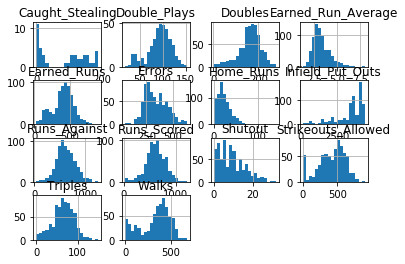

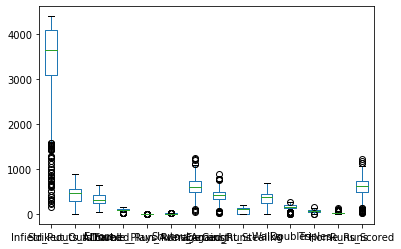

In [179]:
p1[['Infield_Put_Outs', 'Strikeouts_Allowed', 'Errors', 'Double_Plays','Earned_Run_Average','Shutout','Runs_Against','Earned_Runs','Caught_Stealing','Walks','Doubles','Triples','Home_Runs','Runs_Scored']].hist(bins=20)
p1[['Infield_Put_Outs', 'Strikeouts_Allowed', 'Errors', 'Double_Plays','Earned_Run_Average','Shutout','Runs_Against','Earned_Runs','Caught_Stealing','Walks','Doubles','Triples','Home_Runs','Runs_Scored']].plot.box()

In [ ]:
#The above plots show that most of the independent variables are not normally distributed. Some of them are bimodal and 
#some of the are skewed to the right or left. However, some of them like Run Scored and Run Against are approximatly normal.

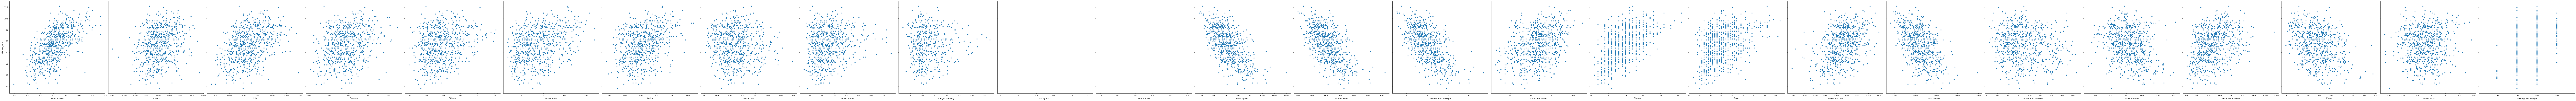

In [181]:
#Exploratory analysis (Cnt.) for period 2:
#Scatter plot of Games Won with all independent offensive and defensive variables.
sns.pairplot(p2, x_vars=['Runs_Scored', 'At_Bats', 'Hits','Doubles', 'Triples', 'Home_Runs', 'Walks', 'Strike_Outs',
       'Stolen_Bases', 'Caught_Stealing', 'Hit_By_Pitch', 'Sacrifice_Fly',
       'Runs_Against', 'Earned_Runs', 'Earned_Run_Average', 'Complete_Games',
       'Shutout', 'Saves', 'Infield_Put_Outs', 'Hits_Allowed',
       'Home_Run_Allowed', 'Walks_Allowed', 'Strikeouts_Allowed', 'Errors',
       'Double_Plays', 'Fielding_Percentage'], y_vars='Games_Won', height=7)

In [183]:
#Exploratory analysis for period 2:
#Correlation between all independent variables
drop_cols = ['Year ', 'Final_Standing', 'Games_Played', 'Games_Lost','League_Win', 'World_Series', 'Hit_By_Pitch', 'Sacrifice_Fly']
p2.new=p2.drop(drop_cols, axis=1)
p2.new.corr(method="spearman")

Games_Won  Runs_Scored   At_Bats      Hits   Doubles  \
Games_Won             1.000000     0.645249  0.242219  0.408853  0.245933   
Runs_Scored           0.645249     1.000000  0.494267  0.782296  0.622540   
At_Bats               0.242219     0.494267  1.000000  0.687604  0.530968   
Hits                  0.408853     0.782296  0.687604  1.000000  0.747512   
Doubles               0.245933     0.622540  0.530968  0.747512  1.000000   
Triples               0.239111     0.438964  0.283566  0.616500  0.468903   
Home_Runs             0.328259     0.363088  0.090150 -0.030490 -0.083693   
Walks                 0.349580     0.412424 -0.062849 -0.056173  0.061694   
Strike_Outs          -0.052477    -0.175497 -0.165880 -0.513397 -0.380142   
Stolen_Bases          0.161153     0.272455  0.084435  0.384080  0.309392   
Caught_Stealing       0.007086     0.079301  0.033530  0.385203  0.283481   
Runs_Against         -0.616846     0.092336  0.166058  0.230122  0.300870   
Earned_Runs          -0.596517     0.087786  0.147605  0.159612  0.250079   
Earned_Run_Average   -0.609288     0.078117  0.103093  0.149499  0.242867   
Complete_Games        0.334504     0.235124  0.129891  0.376012  0.299439   
Shutout               0.516640    -0.008413 -0.068171 -0.126466 -0.182510   
Saves                 0.392587     0.191476 -0.019282 -0.105716 -0.138112   
Infield_Put_Outs      0.385656     0.041344  0.394208  0.029134 -0.053256   
Hits_Allowed         -0.465984     0.146094  0.284179  0.431219  0.441934   
Home_Run_Allowed     -0.096958     0.065462 -0.021601 -0.240326 -0.194785   
Walks_Allowed        -0.240949    -0.016517 -0.066255 -0.246594 -0.099683   
Strikeouts_Allowed    0.341070     0.051443 -0.003552 -0.264647 -0.241810   
Errors               -0.323703     0.024102  0.156929  0.348031  0.312026   
Double_Plays          0.047463     0.033698  0.018723 -0.099576 -0.081319   
Fielding_Percentage   0.310215    -0.054222 -0.090365 -0.286849 -0.256394   

                      Triples  Home_Runs     Walks  Strike_Outs  Stolen_Bases  \
Games_Won            0.239111   0.328259  0.349580    -0.052477      0.161153   
Runs_Scored          0.438964   0.363088  0.412424    -0.175497      0.272455   
At_Bats              0.283566   0.090150 -0.062849    -0.165880      0.084435   
Hits                 0.616500  -0.030490 -0.056173    -0.513397      0.384080   
Doubles              0.468903  -0.083693  0.061694    -0.380142      0.309392   
Triples              1.000000  -0.333860 -0.108666    -0.523358      0.497372   
Home_Runs           -0.333860   1.000000  0.389211     0.655685     -0.363084   
Walks               -0.108666   0.389211  1.000000     0.332512     -0.080758   
Strike_Outs         -0.523358   0.655685  0.332512     1.000000     -0.411808   
Stolen_Bases         0.497372  -0.363084 -0.080758    -0.411808      1.000000   
Caught_Stealing      0.541185  -0.575109 -0.340818    -0.619033      0.756431   
Runs_Against         0.156921  -0.096986 -0.063243    -0.110762      0.061046   
Earned_Runs          0.047670   0.022939  0.019940     0.006701     -0.026473   
Earned_Run_Average   0.049111   0.012306  0.006499    -0.007725     -0.032549   
Complete_Games       0.440764  -0.369441 -0.130483    -0.516572      0.410976   
Shutout             -0.110286   0.075905  0.123827     0.060433     -0.029900   
Saves               -0.203556   0.527346  0.370173     0.428450     -0.207482   
Infield_Put_Outs    -0.030007   0.063720  0.101223     0.123489      0.066058   
Hits_Allowed         0.363085  -0.311781 -0.267751    -0.371058      0.236347   
Home_Run_Allowed    -0.437937   0.703103  0.315547     0.641855     -0.401477   
Walks_Allowed       -0.259954   0.253011  0.443099     0.346566     -0.204055   
Strikeouts_Allowed  -0.372394   0.624031  0.378621     0.625410     -0.318980   
Errors               0.459065  -0.511217 -0.388712    -0.494242      0.399769   
Double_Plays        -0.153613   0.226466  0.191342     0.214646     -0.130

In [ ]:
#The above results show that Games Won is correlated with most of the independent variables in period 2 and there are linear 
#associations between Game Won with most of the independent variables.
#Also, the correlation matrix shows that there are moderate correlations between some independent variables in period 2. 

In [184]:
#First I build a regression model for period2 (1920-1960). Again, I use a backeard elimination regression method to eliminate 
#non-significant variables as follows:
#Step1: I bulid a full model with all offensive and defensive variables. 
#Step2:I start with the most non-significant variable and eliminate it from the model. The significance level is .05. 
#Step3: Continue step2 until all variable in the model are significant.

lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Hits_Allowed+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Errors+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Stolen_Bases+Doubles+Triples+Home_Runs+Runs_Scored', data=p2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     273.2
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          6.15e-232
Time:                        10:59:36   Log-Likelihood:                -1192.9
No. Observations:                 440   AIC:                             2432.
Df Residuals:                     417   BIC:                             2526.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -195.5550     95.514     -2.047      0.041    -383.303      -7.807
Infield_Put_Outs        0.0476      0.018      2.624      0.009       0.012       0.083
Hits_Allowed           -0.0049      0.006     -0.862      0.389      -0.016       0.006
Home_Run_Allowed       -0.0015      0.012     -0.128      0.898      -0.025       0.022
Walks_Allowed          -0.0107      0.004     -2.649      0.008      -0.019      -0.003
Strikeouts_Allowed      0.0050      0.003      1.738      0.083      -0.001       0.011
Errors                  0.0011      0.016      0.072      0.943      -0.030       0.032
Double_Plays            0.0176      0.011      1.552      0.121      -0.005       0.040
Fielding_Percentage    59.6447     63.036      0.946      0.345     -64.264     183.554
Earned_Run_Average     34.0686     18.595      1.832      0.068      -2.483      70.620
Complete_Games          0.1351      0.023      5.859      0.000       0.090       0.180
Shutout                -0.0058      0.062     -0.093      0.926      -0.127       0.116
Saves                   0.3419      0.045      7.614      0.000       0.254       0.430
Runs_Against           -0.0656      0.014     -4.688      0.000      -0.093      -0.038
Earned_Runs            -0.2252      0.123     -1.824      0.069      -0.468       0.017
Caught_Stealing         0.0207      0.014      1.433      0.153      -0.008       0.049
Walks                   0.0050      0.003      1.572      0.117      -0.001       0.011
Strike_Outs            -0.0045      0.003     -1.499      0.135      -0.010       0.001
Stolen_Bases           -0.0165      0.010     -1.725      0.085      -0.035       0.002
Doubles                 0.0043      0.008      0.547      0.585      -0.011       0.020
Triples                 0.0225      0.016      1.389      0.166      -0.009       0.054
Home_Runs               0.0101      0.011      0.910      0.363      -0.012       0.032
Runs_Scored             0.0779      0.005     15.447      0.000       0.068       0.088
==============================================================================
Omnibus:                        1.398   Durbin-Watson:                   2.264
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                1.175
Skew:                          -0.089   Prob(JB):                        0.556
Kurtosis:                       3.181   Cond. No.                     2.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#The above model is the full model with all variables. The R2-adjusted for this model is .93. 
#I start to eliminate unnecessary variables. The Errors has the highest p-value (0.943), so I will drop it.

In [185]:
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Hits_Allowed+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Stolen_Bases+Doubles+Triples+Home_Runs+Runs_Scored', data=p2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     286.9
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          3.59e-233
Time:                        11:03:10   Log-Likelihood:                -1192.9
No. Observations:                 440   AIC:                             2430.
Df Residuals:                     418   BIC:                             2520.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -193.3231     90.225     -2.143      0.033    -370.675     -15.971
Infield_Put_Outs        0.0478      0.018      2.655      0.008       0.012       0.083
Hits_Allowed           -0.0049      0.006     -0.861      0.390      -0.016       0.006
Home_Run_Allowed       -0.0016      0.012     -0.139      0.890      -0.024       0.021
Walks_Allowed          -0.0107      0.004     -2.653      0.008      -0.019      -0.003
Strikeouts_Allowed      0.0050      0.003      1.738      0.083      -0.001       0.011
Double_Plays            0.0176      0.011      1.552      0.121      -0.005       0.040
Fielding_Percentage    56.8505     49.586      1.147      0.252     -40.618     154.319
Earned_Run_Average     34.1971     18.487      1.850      0.065      -2.142      70.536
Complete_Games          0.1350      0.023      5.872      0.000       0.090       0.180
Shutout                -0.0061      0.062     -0.100      0.921      -0.127       0.115
Saves                   0.3415      0.044      7.676      0.000       0.254       0.429
Runs_Against           -0.0651      0.012     -5.443      0.000      -0.089      -0.042
Earned_Runs            -0.2266      0.122     -1.860      0.064      -0.466       0.013
Caught_Stealing         0.0207      0.014      1.434      0.152      -0.008       0.049
Walks                   0.0050      0.003      1.573      0.116      -0.001       0.011
Strike_Outs            -0.0045      0.003     -1.504      0.133      -0.010       0.001
Stolen_Bases           -0.0164      0.010     -1.730      0.084      -0.035       0.002
Doubles                 0.0043      0.008      0.547      0.584      -0.011       0.020
Triples                 0.0226      0.016      1.394      0.164      -0.009       0.054
Home_Runs               0.0101      0.011      0.913      0.362      -0.012       0.032
Runs_Scored             0.0779      0.005     15.466      0.000       0.068       0.088
==============================================================================
Omnibus:                        1.405   Durbin-Watson:                   2.264
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                1.182
Skew:                          -0.089   Prob(JB):                        0.554
Kurtosis:                       3.182   Cond. No.                     2.53e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [186]:
#I will drop Shutout with P-value=.92
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Hits_Allowed+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Stolen_Bases+Doubles+Triples+Home_Runs+Runs_Scored', data=p2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     301.9
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          2.05e-234
Time:                        11:04:59   Log-Likelihood:                -1192.9
No. Observations:                 440   AIC:                             2428.
Df Residuals:                     419   BIC:                             2514.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -192.4696     89.711     -2.145      0.032    -368.809     -16.130
Infield_Put_Outs        0.0476      0.018      2.664      0.008       0.012       0.083
Hits_Allowed           -0.0049      0.006     -0.862      0.389      -0.016       0.006
Home_Run_Allowed       -0.0016      0.012     -0.135      0.893      -0.024       0.021
Walks_Allowed          -0.0107      0.004     -2.656      0.008      -0.019      -0.003
Strikeouts_Allowed      0.0050      0.003      1.739      0.083      -0.001       0.011
Double_Plays            0.0175      0.011      1.551      0.122      -0.005       0.040
Fielding_Percentage    56.6744     49.496      1.145      0.253     -40.616     153.965
Earned_Run_Average     34.0023     18.361      1.852      0.065      -2.089      70.094
Complete_Games          0.1349      0.023      5.881      0.000       0.090       0.180
Saves                   0.3416      0.044      7.690      0.000       0.254       0.429
Runs_Against           -0.0650      0.012     -5.450      0.000      -0.088      -0.042
Earned_Runs            -0.2252      0.121     -1.863      0.063      -0.463       0.012
Caught_Stealing         0.0207      0.014      1.440      0.150      -0.008       0.049
Walks                   0.0049      0.003      1.572      0.117      -0.001       0.011
Strike_Outs            -0.0045      0.003     -1.503      0.134      -0.010       0.001
Stolen_Bases           -0.0164      0.009     -1.731      0.084      -0.035       0.002
Doubles                 0.0044      0.008      0.553      0.580      -0.011       0.020
Triples                 0.0227      0.016      1.411      0.159      -0.009       0.054
Home_Runs               0.0101      0.011      0.915      0.361      -0.012       0.032
Runs_Scored             0.0779      0.005     15.488      0.000       0.068       0.088
==============================================================================
Omnibus:                        1.378   Durbin-Watson:                   2.264
Prob(Omnibus):                  0.502   Jarque-Bera (JB):                1.155
Skew:                          -0.089   Prob(JB):                        0.561
Kurtosis:                       3.178   Cond. No.                     2.52e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
#I will drop Home-Run-Allowed with P-value=.89
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Hits_Allowed+Walks_Allowed+Strikeouts_Allowed+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Stolen_Bases+Doubles+Triples+Home_Runs+Runs_Scored', data=p2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     318.5
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.14e-235
Time:                        11:05:43   Log-Likelihood:                -1192.9
No. Observations:                 440   AIC:                             2426.
Df Residuals:                     420   BIC:                             2508.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -192.7633     89.580     -2.152      0.032    -368.844     -16.683
Infield_Put_Outs        0.0476      0.018      2.670      0.008       0.013       0.083
Hits_Allowed           -0.0047      0.005     -0.857      0.392      -0.015       0.006
Walks_Allowed          -0.0105      0.004     -2.893      0.004      -0.018      -0.003
Strikeouts_Allowed      0.0049      0.003      1.767      0.078      -0.001       0.010
Double_Plays            0.0172      0.011      1.555      0.121      -0.005       0.039
Fielding_Percentage    56.6271     49.437      1.145      0.253     -40.547     153.801
Earned_Run_Average     34.0771     18.331      1.859      0.064      -1.955      70.110
Complete_Games          0.1351      0.023      5.927      0.000       0.090       0.180
Saves                   0.3415      0.044      7.698      0.000       0.254       0.429
Runs_Against           -0.0650      0.012     -5.455      0.000      -0.088      -0.042
Earned_Runs            -0.2263      0.120     -1.878      0.061      -0.463       0.011
Caught_Stealing         0.0209      0.014      1.458      0.146      -0.007       0.049
Walks                   0.0049      0.003      1.570      0.117      -0.001       0.011
Strike_Outs            -0.0045      0.003     -1.517      0.130      -0.010       0.001
Stolen_Bases           -0.0165      0.009     -1.744      0.082      -0.035       0.002
Doubles                 0.0045      0.008      0.565      0.572      -0.011       0.020
Triples                 0.0229      0.016      1.426      0.155      -0.009       0.054
Home_Runs               0.0097      0.011      0.918      0.359      -0.011       0.030
Runs_Scored             0.0780      0.005     15.579      0.000       0.068       0.088
==============================================================================
Omnibus:                        1.327   Durbin-Watson:                   2.264
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                1.104
Skew:                          -0.087   Prob(JB):                        0.576
Kurtosis:                       3.172   Cond. No.                     2.52e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [188]:
#I will drop Doubles with P-value=.57
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Hits_Allowed+Walks_Allowed+Strikeouts_Allowed+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Stolen_Bases+Triples+Home_Runs+Runs_Scored', data=p2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     336.8
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          7.20e-237
Time:                        11:06:42   Log-Likelihood:                -1193.1
No. Observations:                 440   AIC:                             2424.
Df Residuals:                     421   BIC:                             2502.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -188.3620     89.169     -2.112      0.035    -363.633     -13.091
Infield_Put_Outs        0.0468      0.018      2.634      0.009       0.012       0.082
Hits_Allowed           -0.0043      0.005     -0.793      0.428      -0.015       0.006
Walks_Allowed          -0.0104      0.004     -2.864      0.004      -0.017      -0.003
Strikeouts_Allowed      0.0049      0.003      1.790      0.074      -0.000       0.010
Double_Plays            0.0170      0.011      1.535      0.126      -0.005       0.039
Fielding_Percentage    55.5866     49.362      1.126      0.261     -41.441     152.614
Earned_Run_Average     33.2497     18.258      1.821      0.069      -2.639      69.138
Complete_Games          0.1353      0.023      5.937      0.000       0.090       0.180
Saves                   0.3417      0.044      7.709      0.000       0.255       0.429
Runs_Against           -0.0652      0.012     -5.479      0.000      -0.089      -0.042
Earned_Runs            -0.2208      0.120     -1.840      0.066      -0.457       0.015
Caught_Stealing         0.0200      0.014      1.405      0.161      -0.008       0.048
Walks                   0.0045      0.003      1.478      0.140      -0.001       0.010
Strike_Outs            -0.0044      0.003     -1.484      0.139      -0.010       0.001
Stolen_Bases           -0.0169      0.009     -1.787      0.075      -0.035       0.002
Triples                 0.0210      0.016      1.338      0.182      -0.010       0.052
Home_Runs               0.0074      0.010      0.761      0.447      -0.012       0.027
Runs_Scored             0.0796      0.004     19.604      0.000       0.072       0.088
==============================================================================
Omnibus:                        1.388   Durbin-Watson:                   2.268
Prob(Omnibus):                  0.500   Jarque-Bera (JB):                1.164
Skew:                          -0.090   Prob(JB):                        0.559
Kurtosis:                       3.176   Cond. No.                     2.51e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [189]:
#I will drop Home_Runs with P-value=.447
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Hits_Allowed+Walks_Allowed+Strikeouts_Allowed+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Stolen_Bases+Triples+Runs_Scored', data=p2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     356.9
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          5.01e-238
Time:                        11:07:48   Log-Likelihood:                -1193.4
No. Observations:                 440   AIC:                             2423.
Df Residuals:                     422   BIC:                             2496.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -188.7683     89.123     -2.118      0.035    -363.948     -13.589
Infield_Put_Outs        0.0471      0.018      2.657      0.008       0.012       0.082
Hits_Allowed           -0.0052      0.005     -0.974      0.331      -0.016       0.005
Walks_Allowed          -0.0107      0.004     -2.989      0.003      -0.018      -0.004
Strikeouts_Allowed      0.0052      0.003      1.902      0.058      -0.000       0.011
Double_Plays            0.0184      0.011      1.682      0.093      -0.003       0.040
Fielding_Percentage    54.3222     49.310      1.102      0.271     -42.601     151.246
Earned_Run_Average     33.6290     18.242      1.843      0.066      -2.228      69.486
Complete_Games          0.1340      0.023      5.900      0.000       0.089       0.179
Saves                   0.3412      0.044      7.703      0.000       0.254       0.428
Runs_Against           -0.0653      0.012     -5.490      0.000      -0.089      -0.042
Earned_Runs            -0.2226      0.120     -1.857      0.064      -0.458       0.013
Caught_Stealing         0.0204      0.014      1.437      0.152      -0.008       0.048
Walks                   0.0038      0.003      1.302      0.194      -0.002       0.009
Strike_Outs            -0.0031      0.002     -1.281      0.201      -0.008       0.002
Stolen_Bases           -0.0186      0.009     -2.024      0.044      -0.037      -0.001
Triples                 0.0174      0.015      1.165      0.245      -0.012       0.047
Runs_Scored             0.0818      0.003     29.263      0.000       0.076       0.087
==============================================================================
Omnibus:                        1.145   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                0.928
Skew:                          -0.079   Prob(JB):                        0.629
Kurtosis:                       3.160   Cond. No.                     2.51e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [190]:
#I will drop Hits_Allowed with P-value=.33
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Walks_Allowed+Strikeouts_Allowed+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Stolen_Bases+Triples+Runs_Scored', data=p2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     379.2
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          4.06e-239
Time:                        11:08:35   Log-Likelihood:                -1193.9
No. Observations:                 440   AIC:                             2422.
Df Residuals:                     423   BIC:                             2491.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -192.6981     89.026     -2.165      0.031    -367.686     -17.710
Infield_Put_Outs        0.0473      0.018      2.668      0.008       0.012       0.082
Walks_Allowed          -0.0088      0.003     -2.929      0.004      -0.015      -0.003
Strikeouts_Allowed      0.0059      0.003      2.254      0.025       0.001       0.011
Double_Plays            0.0173      0.011      1.596      0.111      -0.004       0.039
Fielding_Percentage    52.4713     49.270      1.065      0.287     -44.374     149.316
Earned_Run_Average     35.0870     18.179      1.930      0.054      -0.646      70.820
Complete_Games          0.1334      0.023      5.877      0.000       0.089       0.178
Saves                   0.3451      0.044      7.826      0.000       0.258       0.432
Runs_Against           -0.0700      0.011     -6.449      0.000      -0.091      -0.049
Earned_Runs            -0.2326      0.119     -1.947      0.052      -0.467       0.002
Caught_Stealing         0.0193      0.014      1.361      0.174      -0.009       0.047
Walks                   0.0039      0.003      1.367      0.172      -0.002       0.010
Strike_Outs            -0.0029      0.002     -1.204      0.229      -0.008       0.002
Stolen_Bases           -0.0179      0.009     -1.960      0.051      -0.036    5.45e-05
Triples                 0.0172      0.015      1.147      0.252      -0.012       0.047
Runs_Scored             0.0815      0.003     29.408      0.000       0.076       0.087
==============================================================================
Omnibus:                        0.976   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                0.770
Skew:                          -0.075   Prob(JB):                        0.680
Kurtosis:                       3.140   Cond. No.                     2.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
#I will Fielding_Percentage with P-value=.29
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Walks_Allowed+Strikeouts_Allowed+Double_Plays+Earned_Run_Average+Complete_Games+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Stolen_Bases+Triples+Runs_Scored', data=p2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     404.3
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          3.49e-240
Time:                        11:10:08   Log-Likelihood:                -1194.4
No. Observations:                 440   AIC:                             2421.
Df Residuals:                     424   BIC:                             2486.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -138.4658     73.034     -1.896      0.059    -282.020       5.089
Infield_Put_Outs       0.0467      0.018      2.633      0.009       0.012       0.082
Walks_Allowed         -0.0090      0.003     -2.991      0.003      -0.015      -0.003
Strikeouts_Allowed     0.0059      0.003      2.247      0.025       0.001       0.011
Double_Plays           0.0179      0.011      1.651      0.100      -0.003       0.039
Earned_Run_Average    34.0019     18.154      1.873      0.062      -1.681      69.684
Complete_Games         0.1316      0.023      5.814      0.000       0.087       0.176
Saves                  0.3457      0.044      7.838      0.000       0.259       0.432
Runs_Against          -0.0768      0.009     -8.718      0.000      -0.094      -0.059
Earned_Runs           -0.2188      0.119     -1.842      0.066      -0.452       0.015
Caught_Stealing        0.0182      0.014      1.288      0.198      -0.010       0.046
Walks                  0.0042      0.003      1.457      0.146      -0.001       0.010
Strike_Outs           -0.0030      0.002     -1.253      0.211      -0.008       0.002
Stolen_Bases          -0.0177      0.009     -1.938      0.053      -0.036       0.000
Triples                0.0156      0.015      1.046      0.296      -0.014       0.045
Runs_Scored            0.0815      0.003     29.441      0.000       0.076       0.087
==============================================================================
Omnibus:                        0.768   Durbin-Watson:                   2.275
Prob(Omnibus):                  0.681   Jarque-Bera (JB):                0.602
Skew:                          -0.078   Prob(JB):                        0.740
Kurtosis:                       3.092   Cond. No.                     1.88e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [192]:
#I will Triples with P-value=.29
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Walks_Allowed+Strikeouts_Allowed+Double_Plays+Earned_Run_Average+Complete_Games+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Stolen_Bases+Runs_Scored', data=p2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     433.0
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          2.84e-241
Time:                        11:10:58   Log-Likelihood:                -1195.0
No. Observations:                 440   AIC:                             2420.
Df Residuals:                     425   BIC:                             2481.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -135.3045     72.980     -1.854      0.064    -278.751       8.142
Infield_Put_Outs       0.0461      0.018      2.602      0.010       0.011       0.081
Walks_Allowed         -0.0088      0.003     -2.940      0.003      -0.015      -0.003
Strikeouts_Allowed     0.0056      0.003      2.146      0.032       0.000       0.011
Double_Plays           0.0172      0.011      1.588      0.113      -0.004       0.038
Earned_Run_Average    33.1771     18.139      1.829      0.068      -2.476      68.830
Complete_Games         0.1320      0.023      5.831      0.000       0.088       0.177
Saves                  0.3473      0.044      7.877      0.000       0.261       0.434
Runs_Against          -0.0761      0.009     -8.666      0.000      -0.093      -0.059
Earned_Runs           -0.2141      0.119     -1.804      0.072      -0.447       0.019
Caught_Stealing        0.0189      0.014      1.339      0.181      -0.009       0.047
Walks                  0.0033      0.003      1.212      0.226      -0.002       0.009
Strike_Outs           -0.0036      0.002     -1.519      0.129      -0.008       0.001
Stolen_Bases          -0.0161      0.009     -1.786      0.075      -0.034       0.002
Runs_Scored            0.0828      0.003     32.836      0.000       0.078       0.088
==============================================================================
Omnibus:                        0.904   Durbin-Watson:                   2.286
Prob(Omnibus):                  0.636   Jarque-Bera (JB):                0.734
Skew:                          -0.089   Prob(JB):                        0.693
Kurtosis:                       3.093   Cond. No.                     1.88e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [193]:
#I will Walks with P-value=.23
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Walks_Allowed+Strikeouts_Allowed+Double_Plays+Earned_Run_Average+Complete_Games+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Strike_Outs+Stolen_Bases+Runs_Scored', data=p2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     465.6
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          2.68e-242
Time:                        11:12:03   Log-Likelihood:                -1195.8
No. Observations:                 440   AIC:                             2420.
Df Residuals:                     426   BIC:                             2477.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -138.1077     72.983     -1.892      0.059    -281.560       5.345
Infield_Put_Outs       0.0468      0.018      2.642      0.009       0.012       0.082
Walks_Allowed         -0.0075      0.003     -2.683      0.008      -0.013      -0.002
Strikeouts_Allowed     0.0055      0.003      2.082      0.038       0.000       0.011
Double_Plays           0.0171      0.011      1.579      0.115      -0.004       0.038
Earned_Run_Average    33.7670     18.142      1.861      0.063      -1.892      69.426
Complete_Games         0.1354      0.022      6.024      0.000       0.091       0.180
Saves                  0.3522      0.044      8.019      0.000       0.266       0.439
Runs_Against          -0.0785      0.009     -9.175      0.000      -0.095      -0.062
Earned_Runs           -0.2156      0.119     -1.815      0.070      -0.449       0.018
Caught_Stealing        0.0170      0.014      1.212      0.226      -0.011       0.045
Strike_Outs           -0.0033      0.002     -1.392      0.165      -0.008       0.001
Stolen_Bases          -0.0161      0.009     -1.786      0.075      -0.034       0.002
Runs_Scored            0.0841      0.002     37.161      0.000       0.080       0.089
==============================================================================
Omnibus:                        0.675   Durbin-Watson:                   2.294
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.548
Skew:                          -0.081   Prob(JB):                        0.760
Kurtosis:                       3.060   Cond. No.                     1.86e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [194]:
#I will Caught_Stealing with P-value=.23
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Walks_Allowed+Strikeouts_Allowed+Double_Plays+Earned_Run_Average+Complete_Games+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Strike_Outs+Stolen_Bases+Runs_Scored', data=p2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     715.0
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:13:11   Log-Likelihood:                -1751.9
No. Observations:                 640   AIC:                             3530.
Df Residuals:                     627   BIC:                             3588.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -157.1671     57.941     -2.713      0.007    -270.950     -43.385
Infield_Put_Outs       0.0522      0.014      3.716      0.000       0.025       0.080
Walks_Allowed         -0.0054      0.002     -2.442      0.015      -0.010      -0.001
Strikeouts_Allowed     0.0043      0.002      1.957      0.051   -1.58e-05       0.009
Double_Plays           0.0108      0.009      1.241      0.215      -0.006       0.028
Earned_Run_Average    35.9194     14.552      2.468      0.014       7.344      64.495
Complete_Games         0.1402      0.019      7.512      0.000       0.104       0.177
Saves                  0.3414      0.037      9.274      0.000       0.269       0.414
Runs_Against          -0.0846      0.007    -11.506      0.000      -0.099      -0.070
Earned_Runs           -0.2269      0.096     -2.373      0.018      -0.415      -0.039
Strike_Outs           -0.0035      0.002     -1.769      0.077      -0.007       0.000
Stolen_Bases          -0.0087      0.006     -1.472      0.141      -0.020       0.003
Runs_Scored            0.0847      0.002     44.403      0.000       0.081       0.088
==============================================================================
Omnibus:                        1.219   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                1.114
Skew:                          -0.100   Prob(JB):                        0.573
Kurtosis:                       3.046   Cond. No.                     1.76e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [195]:
#I will Double_Plays with P-value=.21
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Walks_Allowed+Strikeouts_Allowed+Earned_Run_Average+Complete_Games+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Strike_Outs+Stolen_Bases+Runs_Scored', data=p2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     779.2
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:14:17   Log-Likelihood:                -1752.7
No. Observations:                 640   AIC:                             3529.
Df Residuals:                     628   BIC:                             3583.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -157.1276     57.966     -2.711      0.007    -270.959     -43.296
Infield_Put_Outs       0.0526      0.014      3.742      0.000       0.025       0.080
Walks_Allowed         -0.0046      0.002     -2.157      0.031      -0.009      -0.000
Strikeouts_Allowed     0.0036      0.002      1.688      0.092      -0.001       0.008
Earned_Run_Average    35.9162     14.558      2.467      0.014       7.328      64.504
Complete_Games         0.1399      0.019      7.492      0.000       0.103       0.177
Saves                  0.3469      0.037      9.492      0.000       0.275       0.419
Runs_Against          -0.0870      0.007    -12.267      0.000      -0.101      -0.073
Earned_Runs           -0.2245      0.096     -2.348      0.019      -0.412      -0.037
Strike_Outs           -0.0032      0.002     -1.661      0.097      -0.007       0.001
Stolen_Bases          -0.0089      0.006     -1.504      0.133      -0.021       0.003
Runs_Scored            0.0849      0.002     44.542      0.000       0.081       0.089
==============================================================================
Omnibus:                        1.447   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.485   Jarque-Bera (JB):                1.312
Skew:                          -0.105   Prob(JB):                        0.519
Kurtosis:                       3.069   Cond. No.                     1.76e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [196]:
#I will Stolen_Bases with P-value=.13
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Walks_Allowed+Strikeouts_Allowed+Earned_Run_Average+Complete_Games+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Strike_Outs+Runs_Scored', data=p2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     855.2
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:14:58   Log-Likelihood:                -1753.8
No. Observations:                 640   AIC:                             3530.
Df Residuals:                     629   BIC:                             3579.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -156.9032     58.024     -2.704      0.007    -270.848     -42.959
Infield_Put_Outs       0.0524      0.014      3.729      0.000       0.025       0.080
Walks_Allowed         -0.0044      0.002     -2.106      0.036      -0.009      -0.000
Strikeouts_Allowed     0.0037      0.002      1.762      0.079      -0.000       0.008
Earned_Run_Average    36.3559     14.569      2.495      0.013       7.745      64.967
Complete_Games         0.1364      0.019      7.355      0.000       0.100       0.173
Saves                  0.3440      0.037      9.416      0.000       0.272       0.416
Runs_Against          -0.0889      0.007    -12.707      0.000      -0.103      -0.075
Earned_Runs           -0.2254      0.096     -2.355      0.019      -0.413      -0.037
Strike_Outs           -0.0029      0.002     -1.478      0.140      -0.007       0.001
Runs_Scored            0.0846      0.002     44.603      0.000       0.081       0.088
==============================================================================
Omnibus:                        1.275   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                1.126
Skew:                          -0.093   Prob(JB):                        0.570
Kurtosis:                       3.086   Cond. No.                     1.76e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
#I will Strike_Outs with P-value=.14
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Walks_Allowed+Strikeouts_Allowed+Earned_Run_Average+Complete_Games+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Runs_Scored', data=p2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     948.2
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:15:57   Log-Likelihood:                -1754.9
No. Observations:                 640   AIC:                             3530.
Df Residuals:                     630   BIC:                             3574.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -157.7267     58.076     -2.716      0.007    -271.773     -43.681
Infield_Put_Outs       0.0524      0.014      3.721      0.000       0.025       0.080
Walks_Allowed         -0.0045      0.002     -2.146      0.032      -0.009      -0.000
Strikeouts_Allowed     0.0022      0.002      1.185      0.237      -0.001       0.006
Earned_Run_Average    36.3070     14.583      2.490      0.013       7.670      64.944
Complete_Games         0.1410      0.018      7.709      0.000       0.105       0.177
Saves                  0.3428      0.037      9.375      0.000       0.271       0.415
Runs_Against          -0.0882      0.007    -12.625      0.000      -0.102      -0.074
Earned_Runs           -0.2263      0.096     -2.362      0.018      -0.414      -0.038
Runs_Scored            0.0851      0.002     45.637      0.000       0.081       0.089
==============================================================================
Omnibus:                        0.977   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                0.847
Skew:                          -0.082   Prob(JB):                        0.655
Kurtosis:                       3.070   Cond. No.                     1.74e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [198]:
#I will Strike_Outs_Allowed with P-value=.23
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Walks_Allowed+Earned_Run_Average+Complete_Games+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Runs_Scored', data=p2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     1066.
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:16:43   Log-Likelihood:                -1755.6
No. Observations:                 640   AIC:                             3529.
Df Residuals:                     631   BIC:                             3569.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -154.4155     58.027     -2.661      0.008    -268.365     -40.466
Infield_Put_Outs       0.0520      0.014      3.693      0.000       0.024       0.080
Walks_Allowed         -0.0040      0.002     -1.925      0.055      -0.008       8e-05
Earned_Run_Average    35.1651     14.556      2.416      0.016       6.581      63.749
Complete_Games         0.1354      0.018      7.663      0.000       0.101       0.170
Saves                  0.3484      0.036      9.606      0.000       0.277       0.420
Runs_Against          -0.0911      0.007    -13.903      0.000      -0.104      -0.078
Earned_Runs           -0.2167      0.096     -2.269      0.024      -0.404      -0.029
Runs_Scored            0.0854      0.002     46.416      0.000       0.082       0.089
==============================================================================
Omnibus:                        1.022   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.600   Jarque-Bera (JB):                0.889
Skew:                          -0.084   Prob(JB):                        0.641
Kurtosis:                       3.072   Cond. No.                     1.73e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [199]:
#I will Walks_Allowed with P-value=.055
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Earned_Run_Average+Complete_Games+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Runs_Scored', data=p2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     1212.
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:17:27   Log-Likelihood:                -1757.5
No. Observations:                 640   AIC:                             3531.
Df Residuals:                     632   BIC:                             3567.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -147.8856     58.052     -2.547      0.011    -261.883     -33.888
Infield_Put_Outs       0.0501      0.014      3.562      0.000       0.022       0.078
Earned_Run_Average    33.4833     14.561      2.300      0.022       4.890      62.076
Complete_Games         0.1378      0.018      7.801      0.000       0.103       0.172
Saves                  0.3401      0.036      9.424      0.000       0.269       0.411
Runs_Against          -0.0883      0.006    -13.790      0.000      -0.101      -0.076
Earned_Runs           -0.2106      0.096     -2.202      0.028      -0.398      -0.023
Runs_Scored            0.0856      0.002     46.426      0.000       0.082       0.089
==============================================================================
Omnibus:                        1.303   Durbin-Watson:                   2.187
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.136
Skew:                          -0.088   Prob(JB):                        0.567
Kurtosis:                       3.109   Cond. No.                     1.71e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [248]:
#Calculating the square root of the mean of the squared errors (RMSE) for the final model in period 2:
X = p2[['Infield_Put_Outs','Earned_Run_Average','Complete_Games','Shutout','Saves','Runs_Against','Earned_Runs','Runs_Scored']]
y = p2.Games_Won
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
y_pred = lm2.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.916544121116388


In [ ]:
#The last above model is the final regression model for period2. The adjusted R-squared is 93% 
#that is the same as its corresponding value for the full model, however the final model is a Parsimonious model that is
#a very simpler model than the full model with great explanatory predictive power.

#Most of the independent variables in the final model are defensive. Only the Runs_Scored has a significant effect on the Games
#Won as a defensive variable in period 2. A team in period 2 should be defensive instead of offensive to optimze the number of 
#Games Won. 


#Evaluating The model for period 1:
#The adjusted R-squared value of the final model for period 2 is 93% which is a very high value and indicates that the model
#is very appropriate and can explan 93% of the Games won's variance.

#Statistical significance of the overall model: The F-statistics for the model which test the null hypothesis H0={All regression
#coefficients are equall to zero (b1=...=bk=0)} Vs. the alternative hypothesis H1={at least on of the regression coefficient is
#not zero} is 1212 with a P-value of <.001 that reject the null hypothesis i.e. at least one of the regression coefficient 
#is different from zero with a P-value <.001.

#Statistical significance of each coefficient, including the intercept: The estimated value for the intercept is a significant 
#negative value that means that the expected value of Games Won will be less than 0 when all independent variables are set
#to 0. However, Game Won can only take non-negative values. One way to manage this, might be using the natural log of Game Won
#as the dependent values to take all real numbers.The intercept is significant (P-value=.011).
#All regression coefficients have P-values<.05 and are significant.
#Among defensive variables Infield_Put_Outs, Earned_Run_Average , Complete_Games, Saves, Runs_Against and Earned_Runs have
#significant effects on the Game Won. For example, with one unit increase in the Earned_Run_Average
#the expected value of the Game Won increases about 33.48 (P-value=.022) with a wide 95% confidence interval of (4.9, 62.1). 
#OR for a unit increase in the Earned_Runs the expected value of the Game Won decraeses about .21 (P-value=.028) and 
#95% confidence interval (-.39, -.02). 
#Among offensive variables only Runs_Scored has a positive significant effect on the Games Won. With one unit increase in the
#Runs_Scored the expected value for the Games Won increases about .086 (P-value<.001) with a narrow 95% C.I (.082, .089).

#Are your independent variables approximately normally distributed? Below,I will check the histograms and box plots for the 
#independent variables in the final model. 

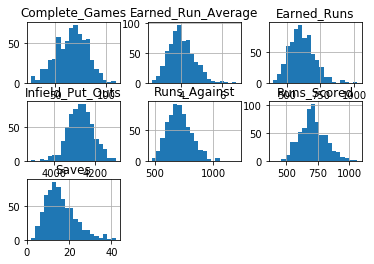

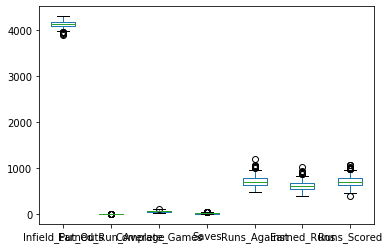

In [200]:
p2[['Infield_Put_Outs','Earned_Run_Average','Complete_Games','Saves','Runs_Against','Earned_Runs','Runs_Scored']].hist(bins=20)
p2[['Infield_Put_Outs','Earned_Run_Average','Complete_Games','Saves','Runs_Against','Earned_Runs','Runs_Scored']].plot.box()

In [ ]:
# It seems most of the significant variables in the final model for period 2 have approximately symmetric distributions with 
#ignorable skewenesses to the right or left and their distributions are close to  the normal distribution.

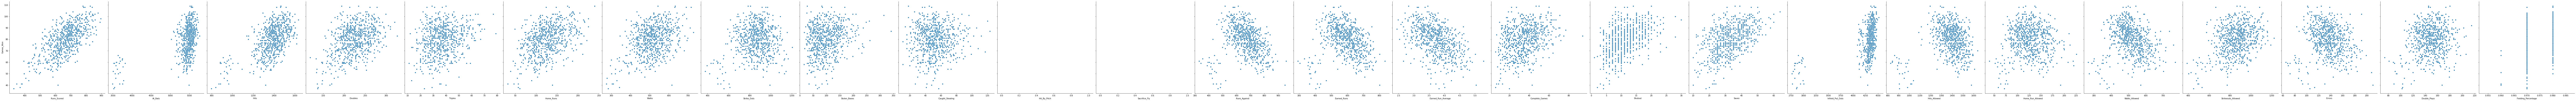

In [201]:
#Exploratory analysis (Cnt.) for period 3:
#Scatter plot of Games Won with all independent offensive and defensive variables.
sns.pairplot(p3, x_vars=['Runs_Scored', 'At_Bats', 'Hits','Doubles', 'Triples', 'Home_Runs', 'Walks', 'Strike_Outs',
       'Stolen_Bases', 'Caught_Stealing', 'Hit_By_Pitch', 'Sacrifice_Fly',
       'Runs_Against', 'Earned_Runs', 'Earned_Run_Average', 'Complete_Games',
       'Shutout', 'Saves', 'Infield_Put_Outs', 'Hits_Allowed',
       'Home_Run_Allowed', 'Walks_Allowed', 'Strikeouts_Allowed', 'Errors',
       'Double_Plays', 'Fielding_Percentage'], y_vars='Games_Won', height=7)

In [202]:
#Exploratory analysis for period 3:
#Correlation between all independent variables
drop_cols = ['Year ', 'Final_Standing', 'Games_Played', 'Games_Lost','League_Win', 'World_Series', 'Hit_By_Pitch', 'Sacrifice_Fly']
p3.new=p3.drop(drop_cols, axis=1)
p3.new.corr(method="spearman")

C:\Users\sahar\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


Games_Won  Runs_Scored   At_Bats      Hits   Doubles  \
Games_Won             1.000000     0.628775  0.352010  0.493893  0.355417   
Runs_Scored           0.628775     1.000000  0.611436  0.810858  0.655596   
At_Bats               0.352010     0.611436  1.000000  0.812430  0.562374   
Hits                  0.493893     0.810858  0.812430  1.000000  0.711894   
Doubles               0.355417     0.655596  0.562374  0.711894  1.000000   
Triples               0.209896     0.243196  0.285263  0.337892  0.284817   
Home_Runs             0.412268     0.687291  0.353044  0.386281  0.336022   
Walks                 0.312605     0.481312  0.085523  0.164012  0.182651   
Strike_Outs           0.022689    -0.025570  0.031112 -0.214934 -0.049827   
Stolen_Bases          0.182627     0.171012  0.121200  0.217381  0.327068   
Caught_Stealing       0.013380     0.022972  0.012366  0.122767  0.209812   
Runs_Against         -0.393825     0.299163  0.302378  0.307657  0.322691   
Earned_Runs          -0.358201     0.330691  0.319761  0.334683  0.360182   
Earned_Run_Average   -0.483987     0.232658  0.169822  0.225245  0.264171   
Complete_Games        0.298612     0.069532  0.013862  0.046969 -0.170531   
Shutout               0.458363    -0.083663 -0.021389 -0.047773 -0.094101   
Saves                 0.481143     0.370890  0.237613  0.311167  0.366483   
Infield_Put_Outs      0.435602     0.202812  0.597540  0.273947  0.160835   
Hits_Allowed         -0.229717     0.335193  0.422793  0.427227  0.387455   
Home_Run_Allowed     -0.054089     0.430790  0.252931  0.248137  0.234213   
Walks_Allowed        -0.298456     0.075815  0.103416  0.060071  0.112794   
Strikeouts_Allowed    0.252206     0.065151  0.151501 -0.007018  0.030630   
Errors               -0.213304    -0.078533  0.082299 -0.004355 -0.081352   
Double_Plays          0.083860     0.243089  0.236492  0.286569  0.182083   
Fielding_Percentage   0.233488     0.114494  0.029262  0.068733  0.124019   

                      Triples  Home_Runs     Walks  Strike_Outs  Stolen_Bases  \
Games_Won            0.209896   0.412268  0.312605     0.022689      0.182627   
Runs_Scored          0.243196   0.687291  0.481312    -0.025570      0.171012   
At_Bats              0.285263   0.353044  0.085523     0.031112      0.121200   
Hits                 0.337892   0.386281  0.164012    -0.214934      0.217381   
Doubles              0.284817   0.336022  0.182651    -0.049827      0.327068   
Triples              1.000000  -0.071509 -0.029809     0.021917      0.152363   
Home_Runs           -0.071509   1.000000  0.349417     0.263787     -0.154718   
Walks               -0.029809   0.349417  1.000000     0.143155      0.151028   
Strike_Outs          0.021917   0.263787  0.143155     1.000000     -0.003202   
Stolen_Bases         0.152363  -0.154718  0.151028    -0.003202      1.000000   
Caught_Stealing      0.116365  -0.212129  0.064347    -0.026824      0.730992   
Runs_Against         0.066245   0.287172  0.221993     0.075442     -0.006517   
Earned_Runs          0.063310   0.312797  0.231876     0.064893      0.005006   
Earned_Run_Average  -0.002305   0.236369  0.134042    -0.041424     -0.047116   
Complete_Games       0.101545   0.077548  0.067852    -0.114150     -0.262575   
Shutout              0.050174  -0.102523 -0.049912     0.061687     -0.009799   
Saves                0.090665   0.269982  0.128970     0.165886      0.264422   
Infield_Put_Outs     0.147100   0.081249  0.175078     0.214791      0.212512   
Hits_Allowed         0.123128   0.217285  0.204290    -0.041198      0.050405   
Home_Run_Allowed    -0.007936   0.588692  0.272592     0.211949     -0.139751   
Walks_Allowed       -0.006610   0.088878  0.221483     0.187549      0.042666   
Strikeouts_Allowed  -0.021619   0.198703  0.117903     0.466592     -0.035594   
Errors               0.128806  -0.088802  0.009953     0.149596     -0.025078   
Double_Plays         0.110123   0.136797  0.148122    -0.031628     -0.057

In [ ]:
#The above results show that Games Won is correlated with most of the independent variables in period 3 and there are linear 
#associations between Game Won with most of the independent variables.
#Also, the correlation matrix shows that there are moderate and high correlations between some independent variables in period 3. 

In [203]:
#First I build a regression model for period3 (1960-1990). Again, I use a backeard elimination regression method to eliminate 
#non-significant variables as follows:
#Step1: I bulid a full model with all offensive and defensive variables. 
#Step2:I start with the most non-significant variable and eliminate it from the model. The significance level is .05. 
#Step3: Continue step2 until all variable in the model are significant.

lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Hits_Allowed+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Errors+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Stolen_Bases+Doubles+Triples+Home_Runs+Runs_Scored', data=p3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     410.3
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:06:46   Log-Likelihood:                -1853.7
No. Observations:                 704   AIC:                             3753.
Df Residuals:                     681   BIC:                             3858.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -148.3271     47.303     -3.136      0.002    -241.205     -55.450
Infield_Put_Outs        0.0169      0.005      3.547      0.000       0.008       0.026
Hits_Allowed            0.0003      0.004      0.080      0.936      -0.008       0.008
Home_Run_Allowed       -0.0037      0.009     -0.405      0.686      -0.021       0.014
Walks_Allowed          -0.0013      0.003     -0.420      0.674      -0.008       0.005
Strikeouts_Allowed      0.0018      0.002      1.135      0.257      -0.001       0.005
Errors               5.618e-05      0.014      0.004      0.997      -0.027       0.027
Double_Plays           -0.0070      0.009     -0.809      0.419      -0.024       0.010
Fielding_Percentage   130.8556     42.177      3.103      0.002      48.043     213.668
Earned_Run_Average      5.7317      5.576      1.028      0.304      -5.216      16.680
Complete_Games          0.1543      0.017      9.091      0.000       0.121       0.188
Shutout                 0.2123      0.043      4.933      0.000       0.128       0.297
Saves                   0.3351      0.024     13.897      0.000       0.288       0.382
Runs_Against           -0.0603      0.014     -4.373      0.000      -0.087      -0.033
Earned_Runs            -0.0501      0.037     -1.344      0.179      -0.123       0.023
Caught_Stealing        -0.0070      0.011     -0.615      0.539      -0.029       0.015
Walks                   0.0048      0.003      1.918      0.056      -0.000       0.010
Strike_Outs            -0.0032      0.002     -1.968      0.049      -0.006   -7.54e-06
Stolen_Bases            0.0076      0.005      1.607      0.108      -0.002       0.017
Doubles                -0.0070      0.006     -1.081      0.280      -0.020       0.006
Triples                 0.0061      0.015      0.415      0.678      -0.023       0.035
Home_Runs               0.0046      0.008      0.600      0.549      -0.010       0.020
Runs_Scored             0.0879      0.004     21.544      0.000       0.080       0.096
==============================================================================
Omnibus:                        0.431   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.806   Jarque-Bera (JB):                0.515
Skew:                          -0.050   Prob(JB):                        0.773
Kurtosis:                       2.913   Cond. No.                     2.34e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#The above model is the full model with all variables. The R2-adjusted for this model is .928. 
#I start to eliminate unnecessary variables. The Errors has the highest p-value (0.997), so I will drop it.

In [204]:

lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Hits_Allowed+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Stolen_Bases+Doubles+Triples+Home_Runs+Runs_Scored', data=p3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:09:44   Log-Likelihood:                -1853.7
No. Observations:                 704   AIC:                             3751.
Df Residuals:                     682   BIC:                             3852.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -148.2166     39.053     -3.795      0.000    -224.894     -71.539
Infield_Put_Outs        0.0169      0.005      3.550      0.000       0.008       0.026
Hits_Allowed            0.0003      0.004      0.081      0.936      -0.008       0.008
Home_Run_Allowed       -0.0037      0.009     -0.410      0.682      -0.021       0.014
Walks_Allowed          -0.0013      0.003     -0.421      0.674      -0.008       0.005
Strikeouts_Allowed      0.0018      0.002      1.138      0.256      -0.001       0.005
Double_Plays           -0.0070      0.009     -0.810      0.418      -0.024       0.010
Fielding_Percentage   130.7485     33.344      3.921      0.000      65.279     196.218
Earned_Run_Average      5.7300      5.557      1.031      0.303      -5.180      16.640
Complete_Games          0.1543      0.017      9.101      0.000       0.121       0.188
Shutout                 0.2123      0.043      4.937      0.000       0.128       0.297
Saves                   0.3351      0.024     13.907      0.000       0.288       0.382
Runs_Against           -0.0603      0.011     -5.431      0.000      -0.082      -0.038
Earned_Runs            -0.0501      0.037     -1.361      0.174      -0.123       0.022
Caught_Stealing        -0.0070      0.011     -0.616      0.538      -0.029       0.015
Walks                   0.0048      0.003      1.921      0.055      -0.000       0.010
Strike_Outs            -0.0032      0.002     -1.976      0.049      -0.006   -2.01e-05
Stolen_Bases            0.0076      0.005      1.609      0.108      -0.002       0.017
Doubles                -0.0070      0.006     -1.092      0.275      -0.019       0.006
Triples                 0.0061      0.015      0.416      0.678      -0.023       0.035
Home_Runs               0.0046      0.008      0.600      0.548      -0.010       0.020
Runs_Scored             0.0879      0.004     21.560      0.000       0.080       0.096
==============================================================================
Omnibus:                        0.431   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.806   Jarque-Bera (JB):                0.515
Skew:                          -0.050   Prob(JB):                        0.773
Kurtosis:                       2.913   Cond. No.                     1.87e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [205]:
#I will drop the Hits_Allowed with P-value=.94

lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Stolen_Bases+Doubles+Triples+Home_Runs+Runs_Scored', data=p3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     452.7
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:43:52   Log-Likelihood:                -1853.7
No. Observations:                 704   AIC:                             3749.
Df Residuals:                     683   BIC:                             3845.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -147.8468     38.756     -3.815      0.000    -223.941     -71.752
Infield_Put_Outs        0.0170      0.005      3.598      0.000       0.008       0.026
Home_Run_Allowed       -0.0040      0.008     -0.483      0.629      -0.020       0.012
Walks_Allowed          -0.0015      0.002     -0.604      0.546      -0.006       0.003
Strikeouts_Allowed      0.0017      0.002      1.145      0.252      -0.001       0.005
Double_Plays           -0.0068      0.008     -0.813      0.417      -0.023       0.010
Fielding_Percentage   130.4493     33.114      3.939      0.000      65.432     195.467
Earned_Run_Average      5.7068      5.545      1.029      0.304      -5.181      16.594
Complete_Games          0.1542      0.017      9.109      0.000       0.121       0.187
Shutout                 0.2120      0.043      4.958      0.000       0.128       0.296
Saves                   0.3351      0.024     13.917      0.000       0.288       0.382
Runs_Against           -0.0601      0.011     -5.535      0.000      -0.081      -0.039
Earned_Runs            -0.0498      0.037     -1.363      0.173      -0.121       0.022
Caught_Stealing        -0.0069      0.011     -0.613      0.540      -0.029       0.015
Walks                   0.0048      0.003      1.925      0.055   -9.69e-05       0.010
Strike_Outs            -0.0032      0.002     -1.982      0.048      -0.006   -3.01e-05
Stolen_Bases            0.0076      0.005      1.609      0.108      -0.002       0.017
Doubles                -0.0070      0.006     -1.091      0.276      -0.019       0.006
Triples                 0.0060      0.015      0.411      0.681      -0.023       0.035
Home_Runs               0.0046      0.008      0.598      0.550      -0.010       0.020
Runs_Scored             0.0879      0.004     21.614      0.000       0.080       0.096
==============================================================================
Omnibus:                        0.423   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.809   Jarque-Bera (JB):                0.507
Skew:                          -0.050   Prob(JB):                        0.776
Kurtosis:                       2.914   Cond. No.                     1.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [206]:
#I will drop the Triples with P-value=.68

lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Stolen_Bases+Doubles+Home_Runs+Runs_Scored', data=p3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     477.1
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:44:42   Log-Likelihood:                -1853.8
No. Observations:                 704   AIC:                             3748.
Df Residuals:                     684   BIC:                             3839.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -147.1014     38.690     -3.802      0.000    -223.066     -71.137
Infield_Put_Outs        0.0169      0.005      3.585      0.000       0.008       0.026
Home_Run_Allowed       -0.0040      0.008     -0.485      0.628      -0.020       0.012
Walks_Allowed          -0.0015      0.002     -0.613      0.540      -0.006       0.003
Strikeouts_Allowed      0.0017      0.002      1.124      0.261      -0.001       0.005
Double_Plays           -0.0068      0.008     -0.810      0.418      -0.023       0.010
Fielding_Percentage   130.1081     33.083      3.933      0.000      65.151     195.065
Earned_Run_Average      5.5970      5.535      1.011      0.312      -5.271      16.465
Complete_Games          0.1548      0.017      9.174      0.000       0.122       0.188
Shutout                 0.2110      0.043      4.947      0.000       0.127       0.295
Saves                   0.3352      0.024     13.930      0.000       0.288       0.382
Runs_Against           -0.0599      0.011     -5.524      0.000      -0.081      -0.039
Earned_Runs            -0.0494      0.036     -1.353      0.177      -0.121       0.022
Caught_Stealing        -0.0070      0.011     -0.622      0.534      -0.029       0.015
Walks                   0.0045      0.002      1.889      0.059      -0.000       0.009
Strike_Outs            -0.0030      0.002     -1.941      0.053      -0.006    3.43e-05
Stolen_Bases            0.0076      0.005      1.617      0.106      -0.002       0.017
Doubles                -0.0069      0.006     -1.091      0.276      -0.019       0.006
Home_Runs               0.0034      0.007      0.477      0.634      -0.010       0.017
Runs_Scored             0.0886      0.004     23.653      0.000       0.081       0.096
==============================================================================
Omnibus:                        0.475   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.789   Jarque-Bera (JB):                0.564
Skew:                          -0.050   Prob(JB):                        0.754
Kurtosis:                       2.904   Cond. No.                     1.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [207]:
#I will drop the Home_Runs with P-value=.63
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Stolen_Bases+Doubles+Runs_Scored', data=p3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     504.2
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:45:29   Log-Likelihood:                -1853.9
No. Observations:                 704   AIC:                             3746.
Df Residuals:                     685   BIC:                             3832.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -148.3057     38.585     -3.844      0.000    -224.065     -72.546
Infield_Put_Outs        0.0168      0.005      3.566      0.000       0.008       0.026
Home_Run_Allowed       -0.0027      0.008     -0.349      0.727      -0.018       0.013
Walks_Allowed          -0.0015      0.002     -0.603      0.547      -0.006       0.003
Strikeouts_Allowed      0.0017      0.002      1.116      0.265      -0.001       0.005
Double_Plays           -0.0072      0.008     -0.859      0.390      -0.024       0.009
Fielding_Percentage   131.6023     32.916      3.998      0.000      66.974     196.231
Earned_Run_Average      5.5329      5.531      1.000      0.317      -5.326      16.392
Complete_Games          0.1549      0.017      9.186      0.000       0.122       0.188
Shutout                 0.2103      0.043      4.935      0.000       0.127       0.294
Saves                   0.3357      0.024     13.970      0.000       0.288       0.383
Runs_Against           -0.0599      0.011     -5.535      0.000      -0.081      -0.039
Earned_Runs            -0.0491      0.036     -1.346      0.179      -0.121       0.022
Caught_Stealing        -0.0069      0.011     -0.610      0.542      -0.029       0.015
Walks                   0.0044      0.002      1.852      0.064      -0.000       0.009
Strike_Outs            -0.0028      0.001     -1.894      0.059      -0.006       0.000
Stolen_Bases            0.0070      0.005      1.546      0.123      -0.002       0.016
Doubles                -0.0074      0.006     -1.173      0.241      -0.020       0.005
Runs_Scored             0.0896      0.003     29.877      0.000       0.084       0.096
==============================================================================
Omnibus:                        0.447   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.800   Jarque-Bera (JB):                0.535
Skew:                          -0.049   Prob(JB):                        0.765
Kurtosis:                       2.906   Cond. No.                     1.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [208]:
#I will drop the Home_Runs_Allowed with P-value=.73
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Walks_Allowed+Strikeouts_Allowed+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Stolen_Bases+Doubles+Runs_Scored', data=p3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     534.5
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:46:17   Log-Likelihood:                -1853.9
No. Observations:                 704   AIC:                             3744.
Df Residuals:                     686   BIC:                             3826.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -147.1379     38.416     -3.830      0.000    -222.564     -71.712
Infield_Put_Outs        0.0168      0.005      3.580      0.000       0.008       0.026
Walks_Allowed          -0.0014      0.002     -0.566      0.572      -0.006       0.003
Strikeouts_Allowed      0.0016      0.002      1.082      0.280      -0.001       0.005
Double_Plays           -0.0070      0.008     -0.843      0.400      -0.023       0.009
Fielding_Percentage   130.4478     32.729      3.986      0.000      66.187     194.708
Earned_Run_Average      5.5283      5.527      1.000      0.318      -5.323      16.380
Complete_Games          0.1542      0.017      9.208      0.000       0.121       0.187
Shutout                 0.2113      0.042      4.975      0.000       0.128       0.295
Saves                   0.3349      0.024     13.999      0.000       0.288       0.382
Runs_Against           -0.0599      0.011     -5.533      0.000      -0.081      -0.039
Earned_Runs            -0.0498      0.036     -1.371      0.171      -0.121       0.022
Caught_Stealing        -0.0067      0.011     -0.592      0.554      -0.029       0.015
Walks                   0.0044      0.002      1.868      0.062      -0.000       0.009
Strike_Outs            -0.0029      0.001     -2.032      0.043      -0.006   -9.72e-05
Stolen_Bases            0.0071      0.005      1.579      0.115      -0.002       0.016
Doubles                -0.0070      0.006     -1.131      0.259      -0.019       0.005
Runs_Scored             0.0894      0.003     30.736      0.000       0.084       0.095
==============================================================================
Omnibus:                        0.451   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.798   Jarque-Bera (JB):                0.541
Skew:                          -0.048   Prob(JB):                        0.763
Kurtosis:                       2.904   Cond. No.                     1.77e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [209]:
#I will drop the Walks_Allowed with P-value=.57
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Strikeouts_Allowed+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Stolen_Bases+Doubles+Runs_Scored', data=p3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     568.4
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:47:01   Log-Likelihood:                -1854.1
No. Observations:                 704   AIC:                             3742.
Df Residuals:                     687   BIC:                             3820.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -148.8101     38.283     -3.887      0.000    -223.975     -73.645
Infield_Put_Outs        0.0169      0.005      3.608      0.000       0.008       0.026
Strikeouts_Allowed      0.0014      0.001      0.970      0.332      -0.001       0.004
Double_Plays           -0.0080      0.008     -0.986      0.324      -0.024       0.008
Fielding_Percentage   131.6344     32.645      4.032      0.000      67.538     195.731
Earned_Run_Average      5.6617      5.519      1.026      0.305      -5.175      16.498
Complete_Games          0.1545      0.017      9.232      0.000       0.122       0.187
Shutout                 0.2122      0.042      5.001      0.000       0.129       0.295
Saves                   0.3351      0.024     14.016      0.000       0.288       0.382
Runs_Against           -0.0603      0.011     -5.594      0.000      -0.081      -0.039
Earned_Runs            -0.0509      0.036     -1.402      0.161      -0.122       0.020
Caught_Stealing        -0.0068      0.011     -0.606      0.544      -0.029       0.015
Walks                   0.0042      0.002      1.800      0.072      -0.000       0.009
Strike_Outs            -0.0029      0.001     -2.024      0.043      -0.006   -8.57e-05
Stolen_Bases            0.0070      0.005      1.559      0.119      -0.002       0.016
Doubles                -0.0069      0.006     -1.115      0.265      -0.019       0.005
Runs_Scored             0.0896      0.003     31.243      0.000       0.084       0.095
==============================================================================
Omnibus:                        0.493   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.580
Skew:                          -0.053   Prob(JB):                        0.748
Kurtosis:                       2.907   Cond. No.                     1.75e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [210]:
#I will drop the Caught_Stealing with P-value=.54
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Strikeouts_Allowed+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Walks+Strike_Outs+Stolen_Bases+Doubles+Runs_Scored', data=p3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     606.9
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:47:44   Log-Likelihood:                -1854.3
No. Observations:                 704   AIC:                             3741.
Df Residuals:                     688   BIC:                             3813.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -149.9200     38.221     -3.922      0.000    -224.964     -74.876
Infield_Put_Outs        0.0169      0.005      3.612      0.000       0.008       0.026
Strikeouts_Allowed      0.0014      0.001      0.952      0.341      -0.001       0.004
Double_Plays           -0.0084      0.008     -1.041      0.298      -0.024       0.007
Fielding_Percentage   132.4385     32.603      4.062      0.000      68.425     196.453
Earned_Run_Average      5.7379      5.515      1.040      0.299      -5.091      16.567
Complete_Games          0.1545      0.017      9.235      0.000       0.122       0.187
Shutout                 0.2129      0.042      5.023      0.000       0.130       0.296
Saves                   0.3357      0.024     14.054      0.000       0.289       0.383
Runs_Against           -0.0607      0.011     -5.638      0.000      -0.082      -0.040
Earned_Runs            -0.0511      0.036     -1.407      0.160      -0.122       0.020
Walks                   0.0043      0.002      1.824      0.069      -0.000       0.009
Strike_Outs            -0.0028      0.001     -1.979      0.048      -0.006   -2.15e-05
Stolen_Bases            0.0051      0.003      1.608      0.108      -0.001       0.011
Doubles                -0.0070      0.006     -1.133      0.258      -0.019       0.005
Runs_Scored             0.0899      0.003     31.598      0.000       0.084       0.095
==============================================================================
Omnibus:                        0.540   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.764   Jarque-Bera (JB):                0.627
Skew:                          -0.056   Prob(JB):                        0.731
Kurtosis:                       2.906   Cond. No.                     1.75e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [211]:
#I will drop the Strikeouts_Allowed with P-value=.34
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Walks+Strike_Outs+Stolen_Bases+Doubles+Runs_Scored', data=p3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     650.2
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:48:33   Log-Likelihood:                -1854.8
No. Observations:                 704   AIC:                             3740.
Df Residuals:                     689   BIC:                             3808.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -149.5521     38.217     -3.913      0.000    -224.587     -74.517
Infield_Put_Outs        0.0174      0.005      3.723      0.000       0.008       0.027
Double_Plays           -0.0116      0.007     -1.563      0.119      -0.026       0.003
Fielding_Percentage   131.5661     32.588      4.037      0.000      67.582     195.550
Earned_Run_Average      5.8143      5.514      1.054      0.292      -5.013      16.641
Complete_Games          0.1531      0.017      9.188      0.000       0.120       0.186
Shutout                 0.2175      0.042      5.165      0.000       0.135       0.300
Saves                   0.3359      0.024     14.067      0.000       0.289       0.383
Runs_Against           -0.0614      0.011     -5.725      0.000      -0.083      -0.040
Earned_Runs            -0.0510      0.036     -1.406      0.160      -0.122       0.020
Walks                   0.0043      0.002      1.850      0.065      -0.000       0.009
Strike_Outs            -0.0024      0.001     -1.769      0.077      -0.005       0.000
Stolen_Bases            0.0044      0.003      1.430      0.153      -0.002       0.010
Doubles                -0.0071      0.006     -1.150      0.251      -0.019       0.005
Runs_Scored             0.0901      0.003     31.763      0.000       0.084       0.096
==============================================================================
Omnibus:                        0.464   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.793   Jarque-Bera (JB):                0.549
Skew:                          -0.052   Prob(JB):                        0.760
Kurtosis:                       2.911   Cond. No.                     1.72e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [213]:
#I will drop the Earned_Run_Average with P-value=.29
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Double_Plays+Fielding_Percentage+Complete_Games+Shutout+Saves+Runs_Against+Earned_Runs+Walks+Strike_Outs+Stolen_Bases+Doubles+Runs_Scored', data=p3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     700.1
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:49:50   Log-Likelihood:                -1855.3
No. Observations:                 704   AIC:                             3739.
Df Residuals:                     690   BIC:                             3802.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -127.1674     31.780     -4.001      0.000    -189.565     -64.770
Infield_Put_Outs        0.0125      0.001     14.333      0.000       0.011       0.014
Double_Plays           -0.0113      0.007     -1.520      0.129      -0.026       0.003
Fielding_Percentage   129.9858     32.556      3.993      0.000      66.064     193.907
Complete_Games          0.1532      0.017      9.198      0.000       0.121       0.186
Shutout                 0.2176      0.042      5.167      0.000       0.135       0.300
Saves                   0.3358      0.024     14.061      0.000       0.289       0.383
Runs_Against           -0.0613      0.011     -5.711      0.000      -0.082      -0.040
Earned_Runs            -0.0147      0.012     -1.276      0.202      -0.037       0.008
Walks                   0.0042      0.002      1.805      0.072      -0.000       0.009
Strike_Outs            -0.0024      0.001     -1.763      0.078      -0.005       0.000
Stolen_Bases            0.0044      0.003      1.434      0.152      -0.002       0.010
Doubles                -0.0072      0.006     -1.164      0.245      -0.019       0.005
Runs_Scored             0.0901      0.003     31.759      0.000       0.084       0.096
==============================================================================
Omnibus:                        0.483   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.786   Jarque-Bera (JB):                0.572
Skew:                          -0.051   Prob(JB):                        0.751
Kurtosis:                       2.905   Cond. No.                     1.61e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [215]:
#I will drop the Earned_Run with P-value=.2
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Double_Plays+Fielding_Percentage+Complete_Games+Shutout+Saves+Runs_Against+Walks+Strike_Outs+Stolen_Bases+Doubles+Runs_Scored', data=p3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     757.6
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:51:00   Log-Likelihood:                -1856.2
No. Observations:                 704   AIC:                             3738.
Df Residuals:                     691   BIC:                             3798.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -107.7253     27.903     -3.861      0.000    -162.511     -52.940
Infield_Put_Outs        0.0127      0.001     14.556      0.000       0.011       0.014
Double_Plays           -0.0119      0.007     -1.605      0.109      -0.026       0.003
Fielding_Percentage   109.9165     28.519      3.854      0.000      53.922     165.911
Complete_Games          0.1531      0.017      9.186      0.000       0.120       0.186
Shutout                 0.2223      0.042      5.297      0.000       0.140       0.305
Saves                   0.3346      0.024     14.015      0.000       0.288       0.381
Runs_Against           -0.0746      0.003    -27.973      0.000      -0.080      -0.069
Walks                   0.0043      0.002      1.823      0.069      -0.000       0.009
Strike_Outs            -0.0023      0.001     -1.729      0.084      -0.005       0.000
Stolen_Bases            0.0044      0.003      1.430      0.153      -0.002       0.010
Doubles                -0.0079      0.006     -1.281      0.201      -0.020       0.004
Runs_Scored             0.0899      0.003     31.720      0.000       0.084       0.095
==============================================================================
Omnibus:                        0.526   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.769   Jarque-Bera (JB):                0.610
Skew:                          -0.056   Prob(JB):                        0.737
Kurtosis:                       2.910   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [216]:
#I will drop the Doubles with P-value=.2
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Double_Plays+Fielding_Percentage+Complete_Games+Shutout+Saves+Runs_Against+Walks+Strike_Outs+Stolen_Bases+Runs_Scored', data=p3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     825.5
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:51:53   Log-Likelihood:                -1857.0
No. Observations:                 704   AIC:                             3738.
Df Residuals:                     692   BIC:                             3793.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -103.1976     27.691     -3.727      0.000    -157.567     -48.828
Infield_Put_Outs        0.0124      0.001     14.581      0.000       0.011       0.014
Double_Plays           -0.0116      0.007     -1.562      0.119      -0.026       0.003
Fielding_Percentage   105.1822     28.292      3.718      0.000      49.634     160.730
Complete_Games          0.1578      0.016      9.704      0.000       0.126       0.190
Shutout                 0.2184      0.042      5.215      0.000       0.136       0.301
Saves                   0.3367      0.024     14.128      0.000       0.290       0.383
Runs_Against           -0.0748      0.003    -28.170      0.000      -0.080      -0.070
Walks                   0.0051      0.002      2.270      0.024       0.001       0.009
Strike_Outs            -0.0020      0.001     -1.545      0.123      -0.005       0.001
Stolen_Bases            0.0037      0.003      1.222      0.222      -0.002       0.010
Runs_Scored             0.0878      0.002     37.855      0.000       0.083       0.092
==============================================================================
Omnibus:                        0.561   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.640
Skew:                          -0.061   Prob(JB):                        0.726
Kurtosis:                       2.916   Cond. No.                     1.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [217]:
#I will drop the Stolen_Bases with P-value=.22
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Double_Plays+Fielding_Percentage+Complete_Games+Shutout+Saves+Runs_Against+Walks+Strike_Outs+Runs_Scored', data=p3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     907.3
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:52:33   Log-Likelihood:                -1857.7
No. Observations:                 704   AIC:                             3737.
Df Residuals:                     693   BIC:                             3788.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -101.9543     27.683     -3.683      0.000    -156.306     -47.602
Infield_Put_Outs        0.0127      0.001     15.146      0.000       0.011       0.014
Double_Plays           -0.0127      0.007     -1.736      0.083      -0.027       0.002
Fielding_Percentage   103.8698     28.282      3.673      0.000      48.342     159.398
Complete_Games          0.1526      0.016      9.720      0.000       0.122       0.183
Shutout                 0.2196      0.042      5.244      0.000       0.137       0.302
Saves                   0.3354      0.024     14.083      0.000       0.289       0.382
Runs_Against           -0.0753      0.003    -28.621      0.000      -0.080      -0.070
Walks                   0.0053      0.002      2.385      0.017       0.001       0.010
Strike_Outs            -0.0023      0.001     -1.734      0.083      -0.005       0.000
Runs_Scored             0.0882      0.002     38.329      0.000       0.084       0.093
==============================================================================
Omnibus:                        0.534   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.766   Jarque-Bera (JB):                0.596
Skew:                          -0.063   Prob(JB):                        0.742
Kurtosis:                       2.933   Cond. No.                     1.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [218]:
#I will drop the Strike_Outs with P-value=.083
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Double_Plays+Fielding_Percentage+Complete_Games+Shutout+Saves+Runs_Against+Walks+Runs_Scored', data=p3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1005.
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:53:34   Log-Likelihood:                -1859.3
No. Observations:                 704   AIC:                             3739.
Df Residuals:                     694   BIC:                             3784.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -103.1783     27.714     -3.723      0.000    -157.591     -48.766
Infield_Put_Outs        0.0120      0.001     16.019      0.000       0.011       0.013
Double_Plays           -0.0114      0.007     -1.558      0.120      -0.026       0.003
Fielding_Percentage   105.6729     28.303      3.734      0.000      50.103     161.243
Complete_Games          0.1556      0.016      9.957      0.000       0.125       0.186
Shutout                 0.2147      0.042      5.130      0.000       0.133       0.297
Saves                   0.3341      0.024     14.015      0.000       0.287       0.381
Runs_Against           -0.0756      0.003    -28.719      0.000      -0.081      -0.070
Walks                   0.0048      0.002      2.168      0.031       0.000       0.009
Runs_Scored             0.0889      0.002     39.340      0.000       0.084       0.093
==============================================================================
Omnibus:                        0.535   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.765   Jarque-Bera (JB):                0.580
Skew:                          -0.065   Prob(JB):                        0.748
Kurtosis:                       2.948   Cond. No.                     1.36e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [219]:
#I will drop the Double_Plays with P-value=.12
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Fielding_Percentage+Complete_Games+Shutout+Saves+Runs_Against+Walks+Runs_Scored', data=p3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1128.
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:54:36   Log-Likelihood:                -1860.5
No. Observations:                 704   AIC:                             3739.
Df Residuals:                     695   BIC:                             3780.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -100.4709     27.687     -3.629      0.000    -154.832     -46.110
Infield_Put_Outs        0.0118      0.001     15.991      0.000       0.010       0.013
Fielding_Percentage   102.7102     28.268      3.633      0.000      47.209     158.212
Complete_Games          0.1543      0.016      9.877      0.000       0.124       0.185
Shutout                 0.2139      0.042      5.106      0.000       0.132       0.296
Saves                   0.3334      0.024     13.973      0.000       0.287       0.380
Runs_Against           -0.0762      0.003    -29.271      0.000      -0.081      -0.071
Walks                   0.0050      0.002      2.240      0.025       0.001       0.009
Runs_Scored             0.0887      0.002     39.296      0.000       0.084       0.093
==============================================================================
Omnibus:                        0.505   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.777   Jarque-Bera (JB):                0.546
Skew:                          -0.064   Prob(JB):                        0.761
Kurtosis:                       2.952   Cond. No.                     1.36e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [247]:
#Calculating MSE for the final model in period 3:
X = p3[['Infield_Put_Outs','Fielding_Percentage','Complete_Games','Shutout','Saves','Runs_Against','Walks','Runs_Scored']]
y = p3.Games_Won
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
y_pred = lm2.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.519735106986585


In [ ]:
#The last above model is the final regression model for period3. The adjusted R-squared is 92.8% 
#that is the same as its corresponding value for the full model, however the final model is a Parsimonious model that is
#a very simpler model than the full model with great explanatory predictive power.

#Most of the independent variables in the final model are defensive. However, there are two defensive variables 
#(walks and Runs_Scored) with significant effects on the Games Won. A team in period 3 should be more defensive to optimze
#the number of Games Won. 


#Evaluating The model for period 1:
#The adjusted R-squared value of the final model for period 3 is 92.8% which is a very high value and indicates that the model
#is very appropriate and can explan about 93% of the Games won's variance.

#Statistical significance of the overall model: The F-statistics for the model which test the null hypothesis H0={All regression
#coefficients are equall to zero (b1=...=bk=0)} Vs. the alternative hypothesis H1={at least on of the regression coefficient is
#not zero} is 1128 with a P-value of <.001 that reject the null hypothesis i.e. at least one of the regression coefficient 
#is different from zero with a P-value <.001.

#Statistical significance of each coefficient, including the intercept: The estimated value for the intercept is a significant 
#negative value that means that the expected value of Games Won will be less than 0 when all independent variables are set
#to 0. However, Game Won can only take non-negative values. One way to manage this, might be using the natural log of Game Won
#as the dependent values to take all real numbers.The intercept is significant (P-value<.001).
#All regression coefficients have P-values<.05 and are significant.
#Among defensive variables Infield_Put_Outs, Fielding_Percentage , Complete_Games, Shutouts, Saves and Runs_Against have
#significant effects on the Game Won. For example, with one unit increase in the Fielding_Percentage
#the expected value of the Game Won increases about 102.7 (P-value<.001) with a wide 95% confidence interval of (47.2, 158.2). 
#OR for a unit increase in the Runs_Against the expected value of the Game Won decraeses about .076 (P-value<.001) and 
#95% confidence interval (-.08, -.07). 
#Among offensive variables Runs_Scored and Walks have positive significant effects on the Games Won.
#With one unit increase in the Runs_Scored the expected value of the Game Won incraeses about .089 (P-value<.001) and 
#95% confidence interval (.084, .093). With one unit increase in the Walks the expected value of Games Won increases about .005
#(P-value=.025) with a 95% C.I (.001, .009)

#Are your independent variables approximately normally distributed? Below,I will check the histograms and box plots for the 
#independent variables in the final model.

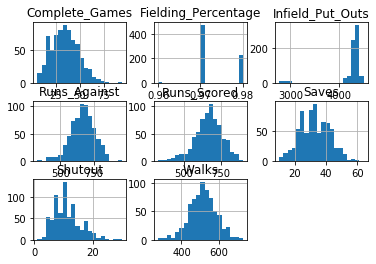

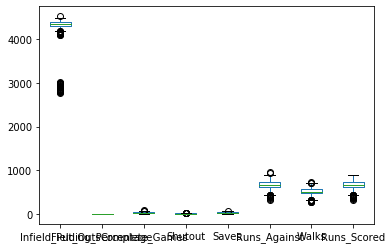

In [222]:
p3[['Infield_Put_Outs','Fielding_Percentage','Complete_Games','Shutout','Saves','Runs_Against','Walks','Runs_Scored']].hist(bins=20)
p3[['Infield_Put_Outs','Fielding_Percentage','Complete_Games','Shutout','Saves','Runs_Against','Walks','Runs_Scored']].plot.box()

In [ ]:
#The above plots show that Infield_Put_Outs and Fielding_Percentage are not normally distributed.The Shutout is skewed to the right 
#So, it is not normal. Other variables of the model have approximately symmetric distributions and are near to the 
#normal distribution.

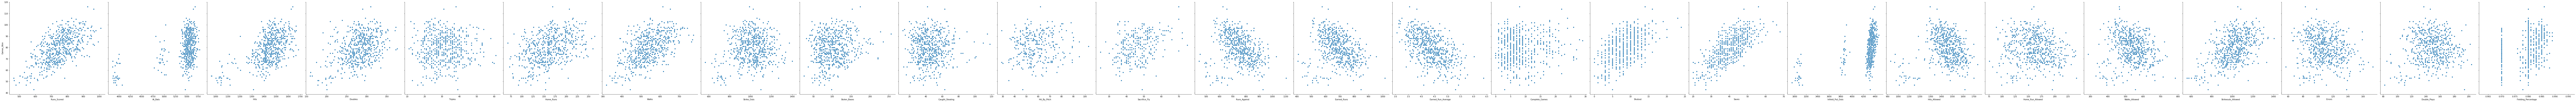

In [223]:
#Exploratory analysis for period 4 (Cnt.):
#Scatter plot of Games Won with all independent offensive and defensive variables.
sns.pairplot(p4, x_vars=['Runs_Scored', 'At_Bats', 'Hits','Doubles', 'Triples', 'Home_Runs', 'Walks', 'Strike_Outs',
       'Stolen_Bases', 'Caught_Stealing', 'Hit_By_Pitch', 'Sacrifice_Fly',
       'Runs_Against', 'Earned_Runs', 'Earned_Run_Average', 'Complete_Games',
       'Shutout', 'Saves', 'Infield_Put_Outs', 'Hits_Allowed',
       'Home_Run_Allowed', 'Walks_Allowed', 'Strikeouts_Allowed', 'Errors',
       'Double_Plays', 'Fielding_Percentage'], y_vars='Games_Won', height=7)

In [225]:
#Exploratory analysis for period 4:
#Correlation between all independent variables
drop_cols = ['Year ', 'Final_Standing', 'Games_Played', 'Games_Lost','League_Win', 'World_Series']
p4.new=p4.drop(drop_cols, axis=1)
p4.new.corr(method="spearman")

Games_Won  Runs_Scored   At_Bats      Hits   Doubles  \
Games_Won             1.000000     0.601321  0.301940  0.469119  0.342467   
Runs_Scored           0.601321     1.000000  0.673665  0.807569  0.624829   
At_Bats               0.301940     0.673665  1.000000  0.872801  0.601640   
Hits                  0.469119     0.807569  0.872801  1.000000  0.654154   
Doubles               0.342467     0.624829  0.601640  0.654154  1.000000   
Triples               0.029930     0.016509  0.088391  0.125429  0.061683   
Home_Runs             0.428047     0.763412  0.455388  0.484675  0.464302   
Walks                 0.509674     0.608406  0.258401  0.322545  0.298831   
Strike_Outs           0.057822     0.234086  0.196196  0.067793  0.325037   
Stolen_Bases          0.134856     0.009992 -0.042009  0.017999 -0.149755   
Caught_Stealing       0.000102    -0.137335 -0.172652 -0.072021 -0.289554   
Runs_Against         -0.365668     0.348682  0.448243  0.375915  0.330618   
Earned_Runs          -0.339427     0.370824  0.465942  0.401192  0.356211   
Earned_Run_Average   -0.547947     0.200129  0.239391  0.193881  0.172136   
Complete_Games        0.071923    -0.126421 -0.196222 -0.165776 -0.277966   
Shutout               0.504894     0.015141 -0.017109  0.036950  0.068951   
Saves                 0.692225     0.262080  0.129491  0.228119  0.120672   
Infield_Put_Outs      0.547542     0.232976  0.456604  0.291074  0.192627   
Hits_Allowed         -0.221778     0.378545  0.533751  0.459113  0.353438   
Home_Run_Allowed     -0.145248     0.419570  0.422563  0.400617  0.375766   
Walks_Allowed        -0.210837     0.148949  0.238413  0.167404  0.143298   
Strikeouts_Allowed    0.453980     0.304895  0.263709  0.280949  0.402085   
Errors               -0.157604    -0.041068 -0.000500 -0.048509 -0.095421   
Double_Plays         -0.018711     0.212105  0.304793  0.271677  0.222474   
Fielding_Percentage   0.298474     0.234724  0.250104  0.267993  0.397696   

                      Triples  Home_Runs     Walks  Strike_Outs  Stolen_Bases  \
Games_Won            0.029930   0.428047  0.509674     0.057822      0.134856   
Runs_Scored          0.016509   0.763412  0.608406     0.234086      0.009992   
At_Bats              0.088391   0.455388  0.258401     0.196196     -0.042009   
Hits                 0.125429   0.484675  0.322545     0.067793      0.017999   
Doubles              0.061683   0.464302  0.298831     0.325037     -0.149755   
Triples              1.000000  -0.179919 -0.113738     0.009037      0.214036   
Home_Runs           -0.179919   1.000000  0.462302     0.427409     -0.175271   
Walks               -0.113738   0.462302  1.000000     0.296436      0.016296   
Strike_Outs          0.009037   0.427409  0.296436     1.000000     -0.069978   
Stolen_Bases         0.214036  -0.175271  0.016296    -0.069978      1.000000   
Caught_Stealing      0.167053  -0.285479 -0.067219    -0.184218      0.647979   
Runs_Against         0.021882   0.340646  0.130000     0.352627     -0.084450   
Earned_Runs          0.021863   0.360188  0.139317     0.353661     -0.094896   
Earned_Run_Average  -0.055431   0.235314 -0.022253     0.168496     -0.170470   
Complete_Games       0.020742  -0.208050  0.022539    -0.333245      0.182957   
Shutout              0.059677  -0.036756  0.111991    -0.008765      0.093080   
Saves                0.072218   0.180072  0.254405     0.017696      0.154019   
Infield_Put_Outs     0.067842   0.145272  0.332447     0.178239      0.161268   
Hits_Allowed         0.040311   0.300969  0.135520     0.313255     -0.061568   
Home_Run_Allowed    -0.004981   0.448565  0.149365     0.384513     -0.065409   
Walks_Allowed        0.053210   0.174211  0.176341     0.273506     -0.001265   
Strikeouts_Allowed  -0.031747   0.346649  0.301201     0.421260      0.009019   
Errors               0.064762  -0.051971  0.019220     0.141160      0.170335   
Double_Plays         0.003454   0.166643  0.107086     0.159623     -0.108

In [ ]:
#The above results show that Games Won is correlated with most of the independent variables in period 3 and there are linear 
#associations between Game Won with most of the independent variables.
#Also, the correlation matrix shows that there are moderate and high correlations between some independent variables in period 3. 

In [227]:
#First I build a regression model for period4 (1990-2010). Again, I use a backeard elimination regression method to eliminate 
#non-significant variables as follows:
#Step1: I bulid a full model with all offensive and defensive variables. 
#Step2:I start with the most non-significant variable and eliminate it from the model. The significance level is .05. 
#Step3: Continue step2 until all variable in the model are significant.

lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Hits_Allowed+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Errors+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Runs+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Stolen_Bases+Doubles+Triples+Home_Runs+Runs_Scored+Hit_By_Pitch+Sacrifice_Fly', data=p4).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     182.9
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          5.90e-154
Time:                        13:27:17   Log-Likelihood:                -738.01
No. Observations:                 300   AIC:                             1526.
Df Residuals:                     275   BIC:                             1619.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1144.0669    501.090      2.283      0.023     157.608    2130.526
Infield_Put_Outs        0.0088      0.034      0.260      0.795      -0.058       0.075
Hits_Allowed            0.0026      0.006      0.439      0.661      -0.009       0.014
Home_Run_Allowed       -0.0187      0.011     -1.667      0.097      -0.041       0.003
Walks_Allowed          -0.0050      0.004     -1.178      0.240      -0.013       0.003
Strikeouts_Allowed      0.0027      0.002      1.145      0.253      -0.002       0.007
Errors                 -0.2197      0.081     -2.718      0.007      -0.379      -0.061
Double_Plays           -0.0009      0.014     -0.062      0.951      -0.029       0.027
Fielding_Percentage -1129.7800    500.582     -2.257      0.025   -2115.240    -144.320
Earned_Run_Average     -4.8246     32.700     -0.148      0.883     -69.199      59.549
Complete_Games          0.1325      0.058      2.299      0.022       0.019       0.246
Shutout                 0.1622      0.069      2.338      0.020       0.026       0.299
Saves                   0.4174      0.031     13.446      0.000       0.356       0.478
Runs_Against           -0.0407      0.020     -2.065      0.040      -0.079      -0.002
Earned_Runs             0.0020      0.205      0.010      0.992      -0.401       0.405
Caught_Stealing         0.0339      0.021      1.655      0.099      -0.006       0.074
Walks                   0.0049      0.003      1.429      0.154      -0.002       0.012
Strike_Outs            -0.0012      0.002     -0.551      0.582      -0.005       0.003
Stolen_Bases            0.0025      0.008      0.330      0.742      -0.012       0.017
Doubles                -0.0091      0.009     -1.042      0.298      -0.026       0.008
Triples                -0.0658      0.022     -3.035      0.003      -0.109      -0.023
Home_Runs               0.0120      0.010      1.251      0.212      -0.007       0.031
Runs_Scored             0.0810      0.005     15.551      0.000       0.071       0.091
Hit_By_Pitch           -0.0045      0.014     -0.323      0.747      -0.032       0.023
Sacrifice_Fly           0.0299      0.025      1.199      0.232      -0.019       0.079
==============================================================================
Omnibus:                        1.577   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                1.493
Skew:                           0.173   Prob(JB):                        0.474
Kurtosis:                       2.995   Cond. No.                     2.08e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+0

In [ ]:
#The above model is the full model with all variables. The R2-adjusted for this model is .936. 
#I start to eliminate unnecessary variables. The Eared_Runs has the highest p-value (0.99), so I will drop it.

In [228]:
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Hits_Allowed+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Errors+Double_Plays+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Stolen_Bases+Doubles+Triples+Home_Runs+Runs_Scored+Hit_By_Pitch+Sacrifice_Fly', data=p4).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     191.6
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          4.21e-155
Time:                        13:30:36   Log-Likelihood:                -738.01
No. Observations:                 300   AIC:                             1524.
Df Residuals:                     276   BIC:                             1613.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1143.1134    490.911      2.329      0.021     176.708    2109.519
Infield_Put_Outs        0.0091      0.007      1.310      0.191      -0.005       0.023
Hits_Allowed            0.0026      0.006      0.444      0.657      -0.009       0.014
Home_Run_Allowed       -0.0187      0.011     -1.693      0.092      -0.040       0.003
Walks_Allowed          -0.0050      0.004     -1.182      0.238      -0.013       0.003
Strikeouts_Allowed      0.0027      0.002      1.149      0.251      -0.002       0.007
Errors                 -0.2197      0.080     -2.739      0.007      -0.378      -0.062
Double_Plays           -0.0009      0.014     -0.062      0.951      -0.029       0.027
Fielding_Percentage -1130.2569    497.369     -2.272      0.024   -2109.376    -151.138
Earned_Run_Average     -4.5016      3.324     -1.354      0.177     -11.046       2.042
Complete_Games          0.1325      0.058      2.304      0.022       0.019       0.246
Shutout                 0.1622      0.069      2.342      0.020       0.026       0.298
Saves                   0.4174      0.031     13.502      0.000       0.357       0.478
Runs_Against           -0.0407      0.020     -2.069      0.039      -0.079      -0.002
Caught_Stealing         0.0339      0.020      1.668      0.097      -0.006       0.074
Walks                   0.0049      0.003      1.439      0.151      -0.002       0.012
Strike_Outs            -0.0012      0.002     -0.552      0.581      -0.005       0.003
Stolen_Bases            0.0025      0.007      0.334      0.739      -0.012       0.017
Doubles                -0.0090      0.009     -1.048      0.296      -0.026       0.008
Triples                -0.0659      0.022     -3.041      0.003      -0.108      -0.023
Home_Runs               0.0120      0.010      1.257      0.210      -0.007       0.031
Runs_Scored             0.0810      0.005     15.634      0.000       0.071       0.091
Hit_By_Pitch           -0.0045      0.014     -0.324      0.746      -0.032       0.023
Sacrifice_Fly           0.0299      0.025      1.204      0.230      -0.019       0.079
==============================================================================
Omnibus:                        1.581   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.454   Jarque-Bera (JB):                1.498
Skew:                           0.173   Prob(JB):                        0.473
Kurtosis:                       2.995   Cond. No.                     2.06e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+07. This might indicate that there are
strong multicollinearity or other numerical proble

In [229]:
#I will drop Double_Plays with P-value=.95
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Hits_Allowed+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Errors+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Stolen_Bases+Doubles+Triples+Home_Runs+Runs_Scored+Hit_By_Pitch+Sacrifice_Fly', data=p4).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     201.0
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          2.94e-156
Time:                        13:33:10   Log-Likelihood:                -738.01
No. Observations:                 300   AIC:                             1522.
Df Residuals:                     277   BIC:                             1607.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1151.7786    469.490      2.453      0.015     227.557    2076.000
Infield_Put_Outs        0.0091      0.007      1.319      0.188      -0.005       0.023
Hits_Allowed            0.0025      0.006      0.445      0.657      -0.008       0.013
Home_Run_Allowed       -0.0186      0.011     -1.699      0.090      -0.040       0.003
Walks_Allowed          -0.0051      0.004     -1.292      0.197      -0.013       0.003
Strikeouts_Allowed      0.0028      0.002      1.246      0.214      -0.002       0.007
Errors                 -0.2210      0.078     -2.848      0.005      -0.374      -0.068
Fielding_Percentage -1139.1350    475.185     -2.397      0.017   -2074.568    -203.702
Earned_Run_Average     -4.4614      3.254     -1.371      0.171     -10.866       1.943
Complete_Games          0.1322      0.057      2.315      0.021       0.020       0.245
Shutout                 0.1618      0.069      2.348      0.020       0.026       0.298
Saves                   0.4175      0.031     13.601      0.000       0.357       0.478
Runs_Against           -0.0408      0.019     -2.098      0.037      -0.079      -0.003
Caught_Stealing         0.0338      0.020      1.671      0.096      -0.006       0.074
Walks                   0.0050      0.003      1.475      0.141      -0.002       0.012
Strike_Outs            -0.0012      0.002     -0.557      0.578      -0.005       0.003
Stolen_Bases            0.0026      0.007      0.346      0.730      -0.012       0.017
Doubles                -0.0090      0.009     -1.051      0.294      -0.026       0.008
Triples                -0.0659      0.022     -3.047      0.003      -0.108      -0.023
Home_Runs               0.0121      0.010      1.262      0.208      -0.007       0.031
Runs_Scored             0.0810      0.005     15.749      0.000       0.071       0.091
Hit_By_Pitch           -0.0045      0.014     -0.326      0.745      -0.032       0.023
Sacrifice_Fly           0.0298      0.025      1.204      0.229      -0.019       0.079
==============================================================================
Omnibus:                        1.616   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.446   Jarque-Bera (JB):                1.529
Skew:                           0.175   Prob(JB):                        0.465
Kurtosis:                       2.997   Cond. No.                     1.97e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [230]:
#I will drop Hit_By_Pitch with P-value=.74
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Hits_Allowed+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Errors+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Stolen_Bases+Doubles+Triples+Home_Runs+Runs_Scored+Sacrifice_Fly', data=p4).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     211.3
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          2.10e-157
Time:                        13:33:59   Log-Likelihood:                -738.07
No. Observations:                 300   AIC:                             1520.
Df Residuals:                     278   BIC:                             1602.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1151.8488    468.735      2.457      0.015     229.128    2074.569
Infield_Put_Outs        0.0090      0.007      1.309      0.192      -0.005       0.023
Hits_Allowed            0.0024      0.006      0.442      0.659      -0.008       0.013
Home_Run_Allowed       -0.0186      0.011     -1.705      0.089      -0.040       0.003
Walks_Allowed          -0.0050      0.004     -1.280      0.202      -0.013       0.003
Strikeouts_Allowed      0.0028      0.002      1.267      0.206      -0.002       0.007
Errors                 -0.2210      0.077     -2.852      0.005      -0.373      -0.068
Fielding_Percentage -1138.8724    474.420     -2.401      0.017   -2072.784    -204.961
Earned_Run_Average     -4.4784      3.248     -1.379      0.169     -10.872       1.915
Complete_Games          0.1307      0.057      2.300      0.022       0.019       0.242
Shutout                 0.1622      0.069      2.357      0.019       0.027       0.298
Saves                   0.4167      0.031     13.645      0.000       0.357       0.477
Runs_Against           -0.0408      0.019     -2.097      0.037      -0.079      -0.002
Caught_Stealing         0.0337      0.020      1.669      0.096      -0.006       0.073
Walks                   0.0051      0.003      1.544      0.124      -0.001       0.012
Strike_Outs            -0.0014      0.002     -0.668      0.504      -0.005       0.003
Stolen_Bases            0.0027      0.007      0.371      0.711      -0.012       0.017
Doubles                -0.0089      0.009     -1.042      0.298      -0.026       0.008
Triples                -0.0649      0.021     -3.036      0.003      -0.107      -0.023
Home_Runs               0.0122      0.010      1.280      0.202      -0.007       0.031
Runs_Scored             0.0807      0.005     15.908      0.000       0.071       0.091
Sacrifice_Fly           0.0299      0.025      1.210      0.227      -0.019       0.079
==============================================================================
Omnibus:                        1.647   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.538
Skew:                           0.175   Prob(JB):                        0.463
Kurtosis:                       3.012   Cond. No.                     1.97e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [231]:
#I will drop Stolen_Bases with P-value=.71
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Hits_Allowed+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Errors+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Doubles+Triples+Home_Runs+Runs_Scored+Sacrifice_Fly', data=p4).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     222.5
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.49e-158
Time:                        13:35:11   Log-Likelihood:                -738.14
No. Observations:                 300   AIC:                             1518.
Df Residuals:                     279   BIC:                             1596.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1165.9803    466.459      2.500      0.013     247.755    2084.206
Infield_Put_Outs        0.0092      0.007      1.339      0.182      -0.004       0.023
Hits_Allowed            0.0025      0.006      0.446      0.656      -0.008       0.013
Home_Run_Allowed       -0.0185      0.011     -1.698      0.091      -0.040       0.003
Walks_Allowed          -0.0049      0.004     -1.264      0.207      -0.013       0.003
Strikeouts_Allowed      0.0028      0.002      1.281      0.201      -0.002       0.007
Errors                 -0.2238      0.077     -2.909      0.004      -0.375      -0.072
Fielding_Percentage -1153.8494    471.964     -2.445      0.015   -2082.913    -224.786
Earned_Run_Average     -4.4665      3.243     -1.377      0.170     -10.850       1.917
Complete_Games          0.1308      0.057      2.306      0.022       0.019       0.242
Shutout                 0.1628      0.069      2.370      0.018       0.028       0.298
Saves                   0.4173      0.030     13.710      0.000       0.357       0.477
Runs_Against           -0.0409      0.019     -2.107      0.036      -0.079      -0.003
Caught_Stealing         0.0379      0.017      2.278      0.023       0.005       0.071
Walks                   0.0050      0.003      1.527      0.128      -0.001       0.012
Strike_Outs            -0.0013      0.002     -0.638      0.524      -0.005       0.003
Doubles                -0.0092      0.008     -1.091      0.276      -0.026       0.007
Triples                -0.0647      0.021     -3.031      0.003      -0.107      -0.023
Home_Runs               0.0118      0.009      1.245      0.214      -0.007       0.030
Runs_Scored             0.0811      0.005     16.243      0.000       0.071       0.091
Sacrifice_Fly           0.0301      0.025      1.220      0.223      -0.018       0.079
==============================================================================
Omnibus:                        1.565   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.457   Jarque-Bera (JB):                1.470
Skew:                           0.171   Prob(JB):                        0.479
Kurtosis:                       3.003   Cond. No.                     1.96e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [232]:
#I will drop Hits_Allowed with P-value=.65
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Errors+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Run_Average+Caught_Stealing+Walks+Strike_Outs+Doubles+Triples+Home_Runs+Runs_Scored+Sacrifice_Fly', data=p4).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     234.9
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.06e-159
Time:                        13:36:00   Log-Likelihood:                -738.25
No. Observations:                 300   AIC:                             1516.
Df Residuals:                     280   BIC:                             1591.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1134.0225    460.269      2.464      0.014     227.996    2040.049
Infield_Put_Outs        0.0100      0.007      1.504      0.134      -0.003       0.023
Home_Run_Allowed       -0.0198      0.011     -1.877      0.062      -0.040       0.001
Walks_Allowed          -0.0059      0.003     -1.854      0.065      -0.012       0.000
Strikeouts_Allowed      0.0026      0.002      1.205      0.229      -0.002       0.007
Errors                 -0.2192      0.076     -2.879      0.004      -0.369      -0.069
Fielding_Percentage -1122.6287    466.082     -2.409      0.017   -2040.099    -205.159
Earned_Run_Average     -4.2384      3.198     -1.325      0.186     -10.533       2.056
Complete_Games          0.1295      0.057      2.289      0.023       0.018       0.241
Shutout                 0.1600      0.068      2.343      0.020       0.026       0.295
Saves                   0.4178      0.030     13.751      0.000       0.358       0.478
Runs_Against           -0.0395      0.019     -2.065      0.040      -0.077      -0.002
Caught_Stealing         0.0374      0.017      2.254      0.025       0.005       0.070
Walks                   0.0049      0.003      1.502      0.134      -0.002       0.011
Strike_Outs            -0.0012      0.002     -0.585      0.559      -0.005       0.003
Doubles                -0.0095      0.008     -1.123      0.262      -0.026       0.007
Triples                -0.0653      0.021     -3.070      0.002      -0.107      -0.023
Home_Runs               0.0113      0.009      1.202      0.230      -0.007       0.030
Runs_Scored             0.0813      0.005     16.370      0.000       0.071       0.091
Sacrifice_Fly           0.0299      0.025      1.215      0.225      -0.019       0.078
==============================================================================
Omnibus:                        1.431   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.489   Jarque-Bera (JB):                1.320
Skew:                           0.162   Prob(JB):                        0.517
Kurtosis:                       3.017   Cond. No.                     1.85e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [233]:
#I will drop Strik_outs with P-value=.56
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Errors+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Run_Average+Caught_Stealing+Walks+Doubles+Triples+Home_Runs+Runs_Scored+Sacrifice_Fly', data=p4).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     248.5
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          7.84e-161
Time:                        13:37:12   Log-Likelihood:                -738.43
No. Observations:                 300   AIC:                             1515.
Df Residuals:                     281   BIC:                             1585.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1109.5189    457.819      2.423      0.016     208.330    2010.708
Infield_Put_Outs        0.0099      0.007      1.484      0.139      -0.003       0.023
Home_Run_Allowed       -0.0199      0.011     -1.892      0.060      -0.041       0.001
Walks_Allowed          -0.0058      0.003     -1.829      0.068      -0.012       0.000
Strikeouts_Allowed      0.0025      0.002      1.175      0.241      -0.002       0.007
Errors                 -0.2167      0.076     -2.855      0.005      -0.366      -0.067
Fielding_Percentage -1098.3197    463.679     -2.369      0.019   -2011.045    -185.595
Earned_Run_Average     -4.3362      3.190     -1.360      0.175     -10.615       1.942
Complete_Games          0.1364      0.055      2.470      0.014       0.028       0.245
Shutout                 0.1582      0.068      2.321      0.021       0.024       0.292
Saves                   0.4194      0.030     13.878      0.000       0.360       0.479
Runs_Against           -0.0390      0.019     -2.046      0.042      -0.077      -0.001
Caught_Stealing         0.0377      0.017      2.277      0.024       0.005       0.070
Walks                   0.0042      0.003      1.385      0.167      -0.002       0.010
Doubles                -0.0105      0.008     -1.280      0.202      -0.027       0.006
Triples                -0.0674      0.021     -3.219      0.001      -0.109      -0.026
Home_Runs               0.0091      0.009      1.059      0.291      -0.008       0.026
Runs_Scored             0.0825      0.005     18.264      0.000       0.074       0.091
Sacrifice_Fly           0.0310      0.025      1.264      0.207      -0.017       0.079
==============================================================================
Omnibus:                        1.460   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                1.350
Skew:                           0.164   Prob(JB):                        0.509
Kurtosis:                       3.016   Cond. No.                     1.80e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [234]:
#I will drop Home_Runs with P-value=.29
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Errors+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Run_Average+Caught_Stealing+Walks+Doubles+Triples+Runs_Scored+Sacrifice_Fly', data=p4).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     262.9
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          8.31e-162
Time:                        13:38:06   Log-Likelihood:                -739.03
No. Observations:                 300   AIC:                             1514.
Df Residuals:                     282   BIC:                             1581.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1057.2687    455.249      2.322      0.021     161.150    1953.387
Infield_Put_Outs        0.0101      0.007      1.516      0.131      -0.003       0.023
Home_Run_Allowed       -0.0188      0.010     -1.796      0.074      -0.039       0.002
Walks_Allowed          -0.0056      0.003     -1.769      0.078      -0.012       0.001
Strikeouts_Allowed      0.0028      0.002      1.352      0.177      -0.001       0.007
Errors                 -0.2068      0.075     -2.744      0.006      -0.355      -0.058
Fielding_Percentage -1047.6635    461.304     -2.271      0.024   -1955.699    -139.628
Earned_Run_Average     -4.3303      3.190     -1.357      0.176     -10.610       1.949
Complete_Games          0.1424      0.055      2.592      0.010       0.034       0.251
Shutout                 0.1495      0.068      2.208      0.028       0.016       0.283
Saves                   0.4244      0.030     14.217      0.000       0.366       0.483
Runs_Against           -0.0390      0.019     -2.046      0.042      -0.077      -0.001
Caught_Stealing         0.0349      0.016      2.138      0.033       0.003       0.067
Walks                   0.0041      0.003      1.357      0.176      -0.002       0.010
Doubles                -0.0122      0.008     -1.507      0.133      -0.028       0.004
Triples                -0.0734      0.020     -3.640      0.000      -0.113      -0.034
Runs_Scored             0.0856      0.003     25.306      0.000       0.079       0.092
Sacrifice_Fly           0.0235      0.023      1.001      0.318      -0.023       0.070
==============================================================================
Omnibus:                        1.536   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.464   Jarque-Bera (JB):                1.383
Skew:                           0.165   Prob(JB):                        0.501
Kurtosis:                       3.045   Cond. No.                     1.79e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [235]:
#I will drop Sacrifice_Fly with P-value=.32
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Errors+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Run_Average+Caught_Stealing+Walks+Doubles+Triples+Runs_Scored', data=p4).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     553.4
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:39:53   Log-Likelihood:                -1457.4
No. Observations:                 578   AIC:                             2949.
Df Residuals:                     561   BIC:                             3023.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -143.1998     52.217     -2.742      0.006    -245.765     -40.634
Infield_Put_Outs        0.0079      0.002      3.611      0.000       0.004       0.012
Home_Run_Allowed       -0.0107      0.008     -1.388      0.166      -0.026       0.004
Walks_Allowed          -0.0064      0.002     -2.625      0.009      -0.011      -0.002
Strikeouts_Allowed      0.0060      0.001      4.249      0.000       0.003       0.009
Errors                 -0.0035      0.015     -0.233      0.816      -0.033       0.026
Fielding_Percentage   156.5334     53.257      2.939      0.003      51.926     261.141
Earned_Run_Average     -1.7684      1.911     -0.926      0.355      -5.521       1.984
Complete_Games          0.1014      0.030      3.355      0.001       0.042       0.161
Shutout                 0.1830      0.050      3.647      0.000       0.084       0.282
Saves                   0.4102      0.022     18.388      0.000       0.366       0.454
Runs_Against           -0.0522      0.012     -4.401      0.000      -0.075      -0.029
Caught_Stealing         0.0153      0.010      1.503      0.133      -0.005       0.035
Walks                   0.0043      0.002      1.846      0.065      -0.000       0.009
Doubles                -0.0109      0.006     -1.896      0.059      -0.022       0.000
Triples                -0.0312      0.015     -2.046      0.041      -0.061      -0.001
Runs_Scored             0.0857      0.003     33.906      0.000       0.081       0.091
==============================================================================
Omnibus:                        3.494   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                3.535
Skew:                           0.189   Prob(JB):                        0.171
Kurtosis:                       2.933   Cond. No.                     2.68e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [236]:
#I will drop Errors with P-value=.82
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Fielding_Percentage+Earned_Run_Average+Complete_Games+Shutout+Saves+Runs_Against+Earned_Run_Average+Caught_Stealing+Walks+Doubles+Triples+Runs_Scored', data=p4).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     591.3
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:40:54   Log-Likelihood:                -1457.4
No. Observations:                 578   AIC:                             2947.
Df Residuals:                     562   BIC:                             3017.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -152.2383     34.926     -4.359      0.000    -220.840     -83.636
Infield_Put_Outs        0.0080      0.002      3.766      0.000       0.004       0.012
Home_Run_Allowed       -0.0106      0.008     -1.375      0.170      -0.026       0.005
Walks_Allowed          -0.0064      0.002     -2.620      0.009      -0.011      -0.002
Strikeouts_Allowed      0.0060      0.001      4.252      0.000       0.003       0.009
Fielding_Percentage   164.9038     39.284      4.198      0.000      87.743     242.065
Earned_Run_Average     -1.5762      1.722     -0.915      0.360      -4.958       1.806
Complete_Games          0.1021      0.030      3.405      0.001       0.043       0.161
Shutout                 0.1833      0.050      3.658      0.000       0.085       0.282
Saves                   0.4102      0.022     18.404      0.000       0.366       0.454
Runs_Against           -0.0534      0.010     -5.111      0.000      -0.074      -0.033
Caught_Stealing         0.0152      0.010      1.500      0.134      -0.005       0.035
Walks                   0.0044      0.002      1.870      0.062      -0.000       0.009
Doubles                -0.0108      0.006     -1.892      0.059      -0.022       0.000
Triples                -0.0312      0.015     -2.052      0.041      -0.061      -0.001
Runs_Scored             0.0857      0.003     34.004      0.000       0.081       0.091
==============================================================================
Omnibus:                        3.453   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                3.490
Skew:                           0.188   Prob(JB):                        0.175
Kurtosis:                       2.936   Cond. No.                     1.89e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [237]:
#I will drop Earned_Run_Average with P-value=.36
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Fielding_Percentage+Complete_Games+Shutout+Saves+Runs_Against+Caught_Stealing+Walks+Doubles+Triples+Runs_Scored', data=p4).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     633.6
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:42:00   Log-Likelihood:                -1457.9
No. Observations:                 578   AIC:                             2946.
Df Residuals:                     563   BIC:                             3011.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -140.5662     32.511     -4.324      0.000    -204.424     -76.708
Infield_Put_Outs        0.0098      0.001     11.013      0.000       0.008       0.012
Home_Run_Allowed       -0.0120      0.008     -1.597      0.111      -0.027       0.003
Walks_Allowed          -0.0067      0.002     -2.774      0.006      -0.011      -0.002
Strikeouts_Allowed      0.0061      0.001      4.381      0.000       0.003       0.009
Fielding_Percentage   145.7495     33.243      4.384      0.000      80.453     211.046
Complete_Games          0.1003      0.030      3.351      0.001       0.041       0.159
Shutout                 0.1801      0.050      3.603      0.000       0.082       0.278
Saves                   0.4089      0.022     18.385      0.000       0.365       0.453
Runs_Against           -0.0625      0.003    -19.191      0.000      -0.069      -0.056
Caught_Stealing         0.0141      0.010      1.398      0.163      -0.006       0.034
Walks                   0.0042      0.002      1.819      0.069      -0.000       0.009
Doubles                -0.0109      0.006     -1.904      0.057      -0.022       0.000
Triples                -0.0311      0.015     -2.042      0.042      -0.061      -0.001
Runs_Scored             0.0858      0.003     34.024      0.000       0.081       0.091
==============================================================================
Omnibus:                        3.689   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                3.720
Skew:                           0.194   Prob(JB):                        0.156
Kurtosis:                       2.944   Cond. No.                     1.68e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [238]:
#I will drop caught_stealing with P-value=.16
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Home_Run_Allowed+Walks_Allowed+Strikeouts_Allowed+Fielding_Percentage+Complete_Games+Shutout+Saves+Runs_Against+Walks+Doubles+Triples+Runs_Scored', data=p4).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     681.1
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:43:07   Log-Likelihood:                -1458.9
No. Observations:                 578   AIC:                             2946.
Df Residuals:                     564   BIC:                             3007.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -130.5475     31.738     -4.113      0.000    -192.887     -68.208
Infield_Put_Outs        0.0101      0.001     11.898      0.000       0.008       0.012
Home_Run_Allowed       -0.0118      0.008     -1.563      0.119      -0.027       0.003
Walks_Allowed          -0.0069      0.002     -2.835      0.005      -0.012      -0.002
Strikeouts_Allowed      0.0058      0.001      4.235      0.000       0.003       0.009
Fielding_Percentage   135.4636     32.446      4.175      0.000      71.734     199.194
Complete_Games          0.1077      0.029      3.652      0.000       0.050       0.166
Shutout                 0.1704      0.050      3.438      0.001       0.073       0.268
Saves                   0.4115      0.022     18.547      0.000       0.368       0.455
Runs_Against           -0.0628      0.003    -19.314      0.000      -0.069      -0.056
Walks                   0.0041      0.002      1.755      0.080      -0.000       0.009
Doubles                -0.0122      0.006     -2.167      0.031      -0.023      -0.001
Triples                -0.0277      0.015     -1.843      0.066      -0.057       0.002
Runs_Scored             0.0858      0.003     33.986      0.000       0.081       0.091
==============================================================================
Omnibus:                        3.023   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                3.059
Skew:                           0.175   Prob(JB):                        0.217
Kurtosis:                       2.934   Cond. No.                     1.63e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [239]:
#I will drop Home_Run_Allowed with P-value=.12
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Walks_Allowed+Strikeouts_Allowed+Fielding_Percentage+Complete_Games+Shutout+Saves+Runs_Against+Walks+Doubles+Triples+Runs_Scored', data=p4).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     735.7
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:43:44   Log-Likelihood:                -1460.1
No. Observations:                 578   AIC:                             2946.
Df Residuals:                     565   BIC:                             3003.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -117.0124     30.573     -3.827      0.000    -177.062     -56.962
Infield_Put_Outs        0.0102      0.001     11.988      0.000       0.009       0.012
Walks_Allowed          -0.0061      0.002     -2.559      0.011      -0.011      -0.001
Strikeouts_Allowed      0.0054      0.001      3.995      0.000       0.003       0.008
Fielding_Percentage   121.7177     31.271      3.892      0.000      60.296     183.140
Complete_Games          0.1125      0.029      3.830      0.000       0.055       0.170
Shutout                 0.1761      0.049      3.558      0.000       0.079       0.273
Saves                   0.4120      0.022     18.548      0.000       0.368       0.456
Runs_Against           -0.0659      0.003    -25.269      0.000      -0.071      -0.061
Walks                   0.0043      0.002      1.832      0.068      -0.000       0.009
Doubles                -0.0111      0.006     -1.984      0.048      -0.022      -0.000
Triples                -0.0268      0.015     -1.780      0.076      -0.056       0.003
Runs_Scored             0.0850      0.002     34.220      0.000       0.080       0.090
==============================================================================
Omnibus:                        3.490   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                3.532
Skew:                           0.188   Prob(JB):                        0.171
Kurtosis:                       2.932   Cond. No.                     1.57e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [240]:
#I will drop Triples with P-value=.076
lm = smf.ols(formula='Games_Won ~Infield_Put_Outs+Walks_Allowed+Strikeouts_Allowed+Fielding_Percentage+Complete_Games+Shutout+Saves+Runs_Against+Walks+Doubles+Runs_Scored', data=p4).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     799.3
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:44:28   Log-Likelihood:                -1461.7
No. Observations:                 578   AIC:                             2947.
Df Residuals:                     566   BIC:                             3000.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -118.8798     30.613     -3.883      0.000    -179.009     -58.751
Infield_Put_Outs        0.0099      0.001     11.835      0.000       0.008       0.012
Walks_Allowed          -0.0063      0.002     -2.634      0.009      -0.011      -0.002
Strikeouts_Allowed      0.0057      0.001      4.219      0.000       0.003       0.008
Fielding_Percentage   123.3623     31.317      3.939      0.000      61.850     184.874
Complete_Games          0.1118      0.029      3.802      0.000       0.054       0.170
Shutout                 0.1762      0.050      3.555      0.000       0.079       0.274
Saves                   0.4124      0.022     18.530      0.000       0.369       0.456
Runs_Against           -0.0656      0.003    -25.158      0.000      -0.071      -0.060
Walks                   0.0052      0.002      2.273      0.023       0.001       0.010
Doubles                -0.0113      0.006     -2.007      0.045      -0.022      -0.000
Runs_Scored             0.0846      0.002     34.157      0.000       0.080       0.089
==============================================================================
Omnibus:                        3.398   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                3.433
Skew:                           0.186   Prob(JB):                        0.180
Kurtosis:                       2.938   Cond. No.                     1.57e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [246]:
#Calculating MSE for the final model in period 4:
X = p4[['Infield_Put_Outs','Walks_Allowed','Strikeouts_Allowed','Fielding_Percentage','Complete_Games','Shutout','Saves','Runs_Against','Walks','Doubles','Runs_Scored']]
y = p4.Games_Won
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
y_pred = lm2.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.036453874662713


In [ ]:
#The last above model is the final regression model for period4. The adjusted R-squared is 93.8% 
#that is better than its corresponding value for the full model. In addition, the final model is a Parsimonious model that is
#a very simpler model than the full model with great explanatory predictive power.

#Most of the independent variables in the final model are defensive. However, there are three defensive variables 
#(walks, Doubles and Runs_Scored) with significant effects on the Games Won. A team in period 4 should be more defensive to 
#optimze the number of Games Won. However, some offensive measurements are also effective.


#Evaluating The model for period 1:
#The adjusted R-squared value of the final model for period 3 is 93.8% which is a very high value and indicates that the model
#is very appropriate and can explan about 94% of the Games won's variance.

#Statistical significance of the overall model: The F-statistics for the model which test the null hypothesis H0={All regression
#coefficients are equall to zero (b1=...=bk=0)} Vs. the alternative hypothesis H1={at least on of the regression coefficient is
#not zero} is 799.3 with a P-value of <.001 that reject the null hypothesis i.e. at least one of the regression coefficient 
#is different from zero with a P-value <.001.

#Statistical significance of each coefficient, including the intercept: The estimated value for the intercept is a significant 
#negative value that means that the expected value of Games Won will be less than 0 when all independent variables are set
#to 0. However, Game Won can only take non-negative values. One way to manage this, might be using the natural log of Game Won
#as the dependent values to take all real numbers.The intercept is significant (P-value<.001).
#All regression coefficients have P-values<.05 and are significant.
#Among defensive variables Infield_Put_Outs, Walks_Allowed, Strikeouts_Allowed, Fielding_Percentage , Complete_Games, Shutouts,
#Saves and Runs_Against have significant effects on the Game Won. For example, with one unit increase in the Fielding_Percentage
#the expected value of the Game Won increases about 123.36 (P-value<.001) with a wide 95% confidence interval of (61.8, 184.9). 
#OR for a unit increase in the Runs_Against the expected value of the Game Won decraeses about -.066 (P-value<.001) and 
#95% confidence interval (-.07, -.06). 
#Among offensive variables Runs_Scored, Doubles and Walks have positive, negative and positive significant effects on the Games
#Won respectivelhy. With one unit increase in the Runs_Scored the expected value of the Game Won incraeses about .085
#(P-value<.001) and 95% confidence interval (.08, .09). With one unit increase in the Doubles the expected value of Games Won
#decreases about .011 (P-value=.045) with a 95% C.I (-.02, .00). With one unit increase in the Walks the expected value of Games
#Won increases about .005 (P-value=.023) with a 95% C.I (.001, .01)

#Are your independent variables approximately normally distributed? Below,I will check the histograms and box plots for the 
#independent variables in the final model.

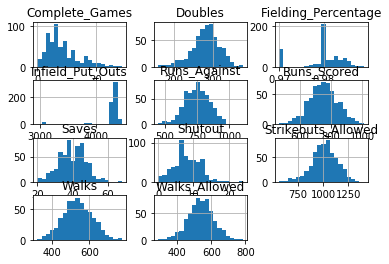

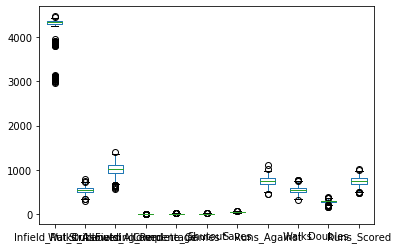

In [242]:
p4[['Infield_Put_Outs','Walks_Allowed','Strikeouts_Allowed','Fielding_Percentage','Complete_Games','Shutout','Saves','Runs_Against','Walks','Doubles','Runs_Scored']].hist(bins=20)
p4[['Infield_Put_Outs','Walks_Allowed','Strikeouts_Allowed','Fielding_Percentage','Complete_Games','Shutout','Saves','Runs_Against','Walks','Doubles','Runs_Scored']].plot.box()

In [ ]:
#Fielding_Percentage, Infield_Put_Outs are not normally distributed. The Complete_Games is skewed to the right and far from 
#normal distribution. Saves and Shutouts seems to be bimodal and far from noraml distribution. Other variables are approximately
#symmetric and close to the normal distribution. 

5.Use the 4th regression model from 1990 to 2010 and forecast the number of games won for the New York Yankees and the Toronto Blue Jays using values for the independent variables for 2012 and 2015.

i.	Discuss the error in your prediction by comparing the actual wins to predicted wins for the 2 teams in the 2 years.

ii.	Quantify your comments about the model error by calculating the Root Mean Square Error for your set of predictions..  An example of this calculation is provided in the Week_5_Example_Notebook.ipynb


In [274]:
#6.Predictions

dt_new = dt[(dt['Team_Name']=='Toronto Blue Jays')|(dt['Team_Name']=='New York Yankees')]
dt_new = dt_new[(dt_new['Year ']==2012)|(dt_new['Year ']==2015)]

In [275]:
dt_new['Team_Name'].unique()

array(['New York Yankees', 'Toronto Blue Jays'], dtype=object)

In [276]:
dt_new['Year '].unique()

array([2012, 2015], dtype=int64)

In [277]:
dt_new.shape

(4, 43)

In [279]:
dt_new.head()

Year  League Team  Franchise  Division  Final_Standing  Games_Played  \
2702   2012     AL   NYA        NYY        E               1           162   
2713   2012     AL   TOR        TOR        E               4           162   
2780   2015     AL   TOR        TOR        E               1           162   
2781   2015     AL   NYA        NYY        E               2           162   

      Unnamed: 7  Games_Won  Games_Lost  ... Hits_Allowed Home_Run_Allowed  \
2702        81.0         95          67  ...         1401              190   
2713        81.0         73          89  ...         1439              204   
2780        81.0         93          69  ...         1353              173   
2781        81.0         87          75  ...         1416              182   

     Walks_Allowed Strikeouts_Allowed  Errors  Double_Plays  \
2702           431               1318      75         135.0   
2713           574               1142     101         167.0   
2780           397               1117      88         145.0   
2781           474               1370      93         135.0   

      Fielding_Percentage          Team_Name      Home_Ball_Park  Attendance  
2702                0.987   New York Yankees  Yankee Stadium III   3542406.0  
2713                0.984  Toronto Blue Jays       Rogers Centre   2099663.0  
2780                0.985  Toronto Blue Jays       Rogers Centre   2794891.0  
2781                0.985   New York Yankees  Yankee Stadium III   3193795.0  

[4 rows x 43 columns]

In [280]:
x_new=dt_new[['Infield_Put_Outs','Walks_Allowed','Strikeouts_Allowed','Fielding_Percentage','Complete_Games','Shutout','Saves','Runs_Against','Walks','Doubles','Runs_Scored']]
y_new=dt_new[['Games_Won']]

In [281]:
x_new.head()

Infield_Put_Outs  Walks_Allowed  Strikeouts_Allowed  \
2702              4336            431                1318   
2713              4331            574                1142   
2780              4323            397                1117   
2781              4373            474                1370   

      Fielding_Percentage  Complete_Games  Shutout  Saves  Runs_Against  \
2702                0.987               6        9     51           668   
2713                0.984               5       11     29           784   
2780                0.985               7       10     34           670   
2781                0.985               3        4     48           698   

      Walks  Doubles  Runs_Scored  
2702    565      280          804  
2713    473      247          716  
2780    570      308          891  
2781    554      272          764

In [282]:
y_new.head()

Games_Won
2702         95
2713         73
2780         93
2781         87

In [283]:
#Using the final model for period 4 to forecast.
lm.forecast = smf.ols(formula='Games_Won ~Infield_Put_Outs+Walks_Allowed+Strikeouts_Allowed+Fielding_Percentage+Complete_Games+Shutout+Saves+Runs_Against+Walks+Doubles+Runs_Scored', data=p4).fit()

In [284]:
#PRedicted values for 8 observations of the 2 teams during 2012-2015
lm.forecast.predict(x_new)

2702    97.983046
2713    71.683132
2780    96.892471
2781    90.359321
dtype: float64

In [ ]:
#i.Discuss the error in your prediction by comparing the actual wins to predicted wins for the 2 teams in the 2 years.
#The difference between true and predicted values for Games_Won are not small and it seems the model is not very powerful
#to forecast the Games-Won for 2012 and 2015 for these two teams.

In [285]:
#ii.Quantify your comments about the model error by calculating the Root Mean Square Error for your set of predictions.
y_true = [95, 73, 93, 87]
y_pred = [97.983046, 71.683132, 96.892471, 90.359321]
# calculate MAE, MSE, RMSE
print (metrics.mean_absolute_error(y_true, y_pred))
print (metrics.mean_squared_error(y_true, y_pred))
print (np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

2.887926499999999
9.267268208605493
3.044218817464588


In [ ]:
#The MAE (the mean of  absolute errors) describes the typical magnitude of the residuals
#The MSE (the mean of squared-errors) measures the average of error squares i.e. the average squared difference between
#the estimated values and true value. It is always non – negative and values close to zero are better.
#The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how
#close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE 
#is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the
#unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE
#indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important
#criterion for fit if the main purpose of the model is prediction.

#Since the RMSE is far from zero I conclude that the fitted model for 1990-2010 is not adequately appropriate to forecast the Games_won
#for 2012 and 2015 years.  


In [ ]:
#7.Conclusions
#The results showed that effective variables on the number of games won are different among different periods. 
#In Period 1 (before 1920) a balance of offensive and defensive variables had siginificant effects on the games won. However,
#In periods after 1920 most of the effective variables were defensive instead of offensive. Specifically, in poeriod 2 (1920 to 1960)
#only one offensive variable (Runs_Scored) was associated with the games won. In period 3 (1960 to 1990), two offensive 
#variables (Runs_Scored and Walks) were associated with games won and in period 4 (1990 to 2010) three offensive variables 
#(Runs_Scored, Walks and Doubles) were associated with the games won. We see that Runs_Scored was a significant factor during 
#all 4 periods. Also Walks was significant in period1, 3 and 4 and Walks was significant in both periods 1 and 4.

#Among defensive covarites Infield_Put_Outs and Runs_Against were significant during all periods. The Earned_Run_Average was 
#significant in periods 1 and 2. The Complete_Games was significant in periods 2,3,4. The Shutouts was significant in periods 1,
#3 and 4. The Saves was associated with games won in periods 2,3 and 4. The Earned_Runs was significant in periods 1 and 2. 
#The Fielding_Percentage in periods 3 and 4 had large significant effects on the games won.

#the results of the last 3 periods are more similar comparing to period 1. Overall, In my view, the teams should play 
#more defensive than offensive, however, there are some offensive factores i.e. Runs_Scored, Walks and Doubles that are 
#important for Games_won.
